# EDA Inicial

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sellin = pd.read_csv("datasets/sell-in.csv", sep='\t')
productos = pd.read_csv("datasets/tb_productos.csv", sep='\t')
stocks = pd.read_csv("datasets/tb_stocks.csv", sep='\t')

In [15]:
# Verificación inicial
print("Sell-In:", sellin.shape)
print("Productos:", productos.shape)
print("Stocks:", stocks.shape)


Sell-In: (2945818, 7)
Productos: (1262, 6)
Stocks: (13691, 3)


In [22]:
# 3. MERGE INICIAL
df = sellin.merge(productos, on="product_id", how="left")
df = df.merge(stocks, on=["product_id", "periodo"], how="left")

In [23]:
df.shape

(2988650, 13)

In [58]:
2988650 - 2945818

42832

quiero saber cuantos productos en un mismo mes

productos debería tener una fila por product_id

In [66]:
productos['product_id'].nunique() == productos.shape[0]

False

In [68]:
productos.shape

(1262, 6)

In [67]:
productos[productos.duplicated(subset=['product_id'], keep=False)].sort_values('product_id')

cat1            cat2            cat3     brand  sku_size  product_id
36      HC     ROPA LAVADO           Polvo   LIMPIEX       400       20010
37      HC     ROPA LAVADO           Polvo   LIMPIEX       400       20010
43      HC     ROPA LAVADO           Polvo   LIMPIEX       800       20020
44      HC     ROPA LAVADO           Polvo   LIMPIEX       800       20020
41      HC     ROPA LAVADO           Polvo   LIMPIEX       400       20021
42      HC     ROPA LAVADO           Polvo   LIMPIEX       400       20021
38      HC     ROPA LAVADO           Polvo   LIMPIEX       800       20022
39      HC     ROPA LAVADO           Polvo   LIMPIEX       800       20022
552  FOODS  SOPAS Y CALDOS      Caldo Cubo     MAGGI        12       20037
553  FOODS  SOPAS Y CALDOS      Caldo Cubo     MAGGI        12       20037
900  FOODS        ADEREZOS         Mostaza  MOSTAZA1        60       20100
898  FOODS        ADEREZOS         Mostaza  MOSTAZA1        60       20100
646  FOODS  SOPAS Y CALDOS      Salsas Wet     MAGGI       350       20105
644  FOODS  SOPAS Y CALDOS      Salsas Wet     MAGGI       350       20105
550  FOODS  SOPAS Y CALDOS      Caldo Cubo     MAGGI         2       20192
551  FOODS  SOPAS Y CALDOS      Caldo Cubo     MAGGI         2       20192
917     PC         CABELLO  ACONDICIONADOR  SHAMPOO3       350       20230
983     PC         CABELLO         SHAMPOO  SHAMPOO3       350       20230
542  FOODS  SOPAS Y CALDOS      Caldo Cubo     MAGGI         2       20278
541  FOODS  SOPAS Y CALDOS      Caldo Cubo     MAGGI         2       20278
981     PC         CABELLO         SHAMPOO  SHAMPOO3       350       20623
915     PC         CABELLO  ACONDICIONADOR  SHAMPOO3       350       20623

In [70]:
productos_clean = productos.drop_duplicates(subset=['product_id'], keep='first')
print(productos_clean.shape)
# 3. MERGE INICIAL
df = sellin.merge(productos_clean, on="product_id", how="left")
df = df.merge(stocks, on=["product_id", "periodo"], how="left")
print(sellin.shape)
print(df.shape)

(1251, 6)
(2945818, 7)
(2945818, 13)


stocks debería tener una fila por combinación (product_id, periodo)

In [59]:
stocks.groupby(['product_id', 'periodo']).size().max()

1

ver cuantas filas agrega cada merge

In [62]:
sellin.shape

(2945818, 7)

In [61]:
df_merge1 = sellin.merge(productos, on='product_id', how='left')
print("Tras merge con productos:", df_merge1.shape)

Tras merge con productos: (2988650, 12)


In [64]:
df_merge2 = sellin.merge(stocks, on=['product_id', 'periodo'], how='left')
print("Tras merge con stocks:", df_merge2.shape)

Tras merge con stocks: (2945818, 8)


In [65]:
duplicados = df_merge1[df_merge1.duplicated(subset=sellin.columns.tolist(), keep=False)]
print("Duplicados en base al sellin original:", duplicados.shape[0])


Duplicados en base al sellin original: 85664


In [71]:
df.isna().sum()

periodo                        0
customer_id                    0
product_id                     0
plan_precios_cuidados          0
cust_request_qty               0
cust_request_tn                0
tn                             0
cat1                        7448
cat2                        7448
cat3                        7448
brand                       7448
sku_size                    7448
stock_final              1814301
dtype: int64

In [80]:
# 4. CREACIÓN DE VARIABLES ÚTILES
df['anio'] = df['periodo'] // 100       # Divide por 100 y descarta decimales → 2023
df['mes'] = df['periodo'] % 100         # Resto de dividir por 100 → 08
df[['mes','anio']].head(1)

mes  anio
0    1  2017

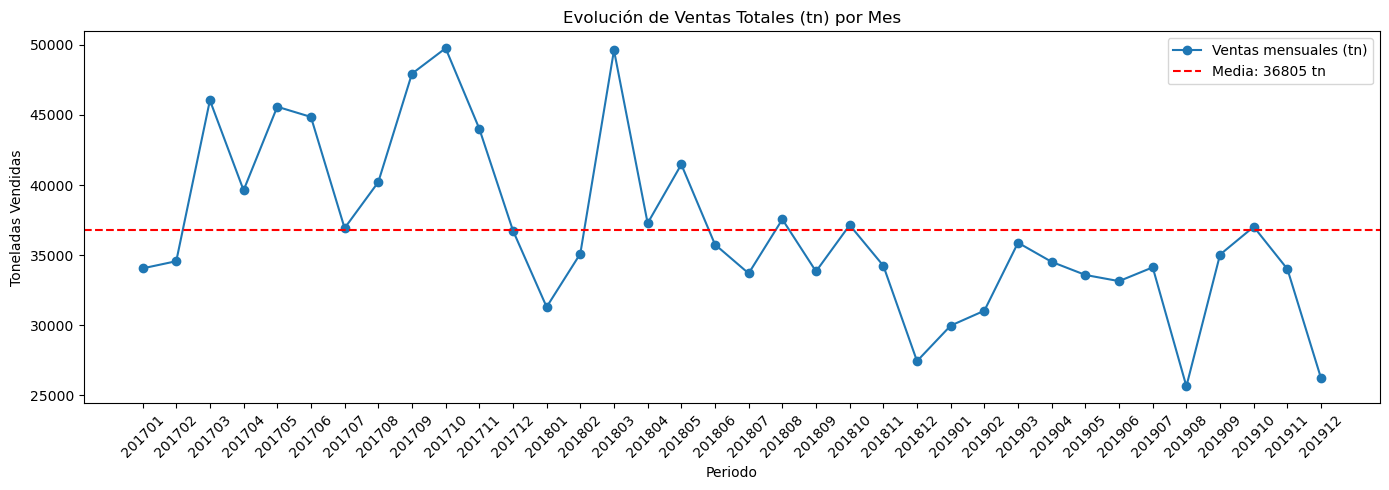

In [81]:
# 5. EXPLORACIÓN GENERAL DE VENTAS
ventas_mensuales = df.groupby('periodo')['tn'].sum().reset_index()

# Calcular media
media_tn = ventas_mensuales['tn'].mean()

# Gráfico
plt.figure(figsize=(14, 5))
plt.plot(ventas_mensuales['periodo'].astype(str), ventas_mensuales['tn'],
         marker='o', label='Ventas mensuales (tn)')

# Línea de media
plt.axhline(media_tn, color='red', linestyle='--', label=f'Media: {media_tn:.0f} tn')

# Personalización
plt.title("Evolución de Ventas Totales (tn) por Mes")
plt.xlabel("Periodo")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [83]:
# Analisis de cat1
productos['cat1'].unique()

array(['HC', 'PC', 'FOODS', 'REF'], dtype=object)

cat1 cat2      cat3     brand  sku_size  product_id
673  REF   TE    Frutas  TWININGS        20       21271
674  REF   TE   Hierbas  TWININGS        20       21218
675  REF   TE  Especial  TWININGS        10       21257
676  REF   TE  Especial  TWININGS        20       21181
677  REF   TE  Especial  TWININGS        10       21255
678  REF   TE  Especial  TWININGS        20       21170
679  REF   TE   Hierbas  TWININGS        20       21202
680  REF   TE    Frutas  TWININGS        20       21264
681  REF   TE     Verde  TWININGS        20       21192
682  REF   TE      Azul  TWININGS        20       20982
683  REF   TE      Azul  TWININGS        10       21161
684  REF   TE     Verde  TWININGS        20       21222
685  REF   TE      Azul  TWININGS       225       21185

In [75]:
df.groupby(['periodo', 'cat1'])['tn'].sum().reset_index()

periodo   cat1           tn
0     201701  FOODS   6490.77514
1     201701     HC  20304.28696
2     201701     PC   7183.23406
3     201701    REF      8.98416
4     201702  FOODS   7096.08999
..       ...    ...          ...
139   201911    REF      0.47064
140   201912  FOODS   4907.41446
141   201912     HC  16045.64484
142   201912     PC   5263.63905
143   201912    REF      0.36893

[144 rows x 3 columns]

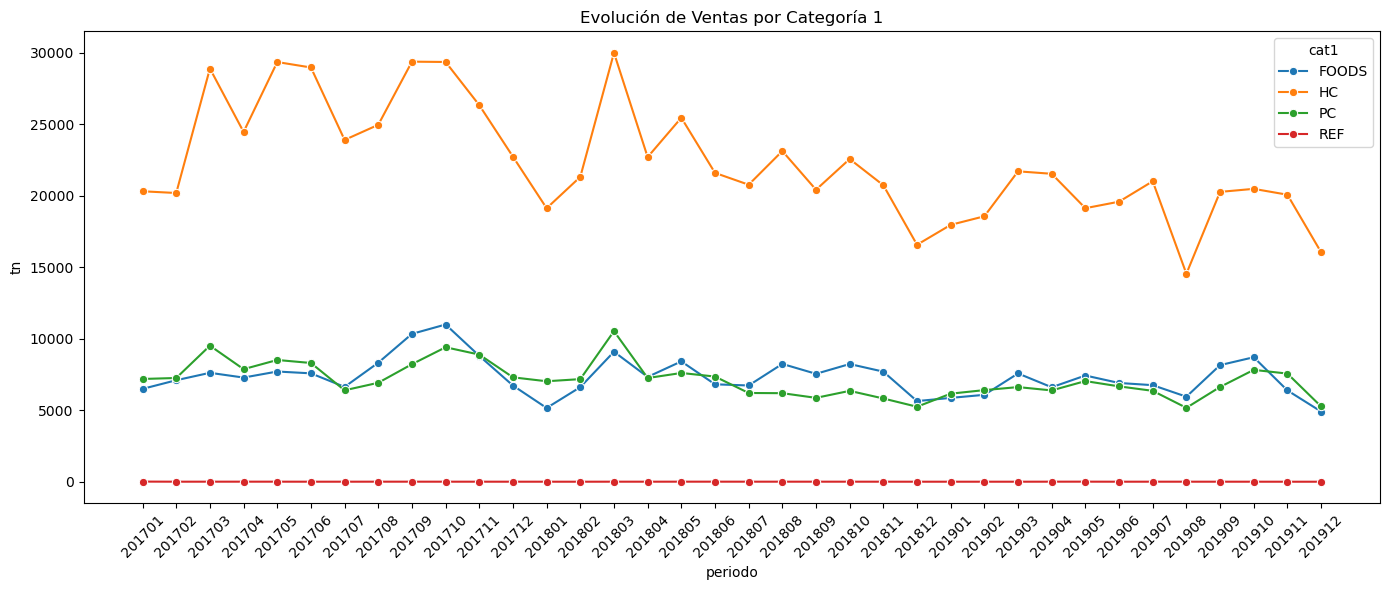

In [94]:
# 6. ANÁLISIS POR CATEGORÍA 1
cat_ventas = df.groupby(['periodo', 'cat1'])['tn'].sum().reset_index()
cat_ventas['periodo'] = cat_ventas['periodo'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=cat_ventas, x='periodo', y='tn', hue='cat1', marker='o')
plt.title("Evolución de Ventas por Categoría 1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [99]:
ventas_cat_REF = df[df['cat1'] == 'REF']
print(ventas_cat_REF.shape)
print(ventas_cat_REF[ventas_cat_REF['tn'] < 1].shape)

(6179, 15)
(6177, 15)


In [101]:
ventas_cat_REF[ventas_cat_REF['tn'] > 1]

periodo  customer_id  product_id  plan_precios_cuidados  \
76034     201701        10001       20982                      0   
2422530   201905        10001       20982                      0   

         cust_request_qty  cust_request_tn       tn cat1 cat2  cat3     brand  \
76034                   4          1.42397  1.42397  REF   TE  Azul  TWININGS   
2422530                 5          2.00710  2.00710  REF   TE  Azul  TWININGS   

         sku_size  stock_final  anio  mes  
76034        20.0          NaN  2017    1  
2422530      20.0      0.02621  2019    5

cat1 cat2      cat3     brand  sku_size  product_id
673  REF   TE    Frutas  TWININGS        20       21271
674  REF   TE   Hierbas  TWININGS        20       21218
675  REF   TE  Especial  TWININGS        10       21257
676  REF   TE  Especial  TWININGS        20       21181
677  REF   TE  Especial  TWININGS        10       21255
678  REF   TE  Especial  TWININGS        20       21170
679  REF   TE   Hierbas  TWININGS        20       21202
680  REF   TE    Frutas  TWININGS        20       21264
681  REF   TE     Verde  TWININGS        20       21192
682  REF   TE      Azul  TWININGS        20       20982
683  REF   TE      Azul  TWININGS        10       21161
684  REF   TE     Verde  TWININGS        20       21222
685  REF   TE      Azul  TWININGS       225       21185

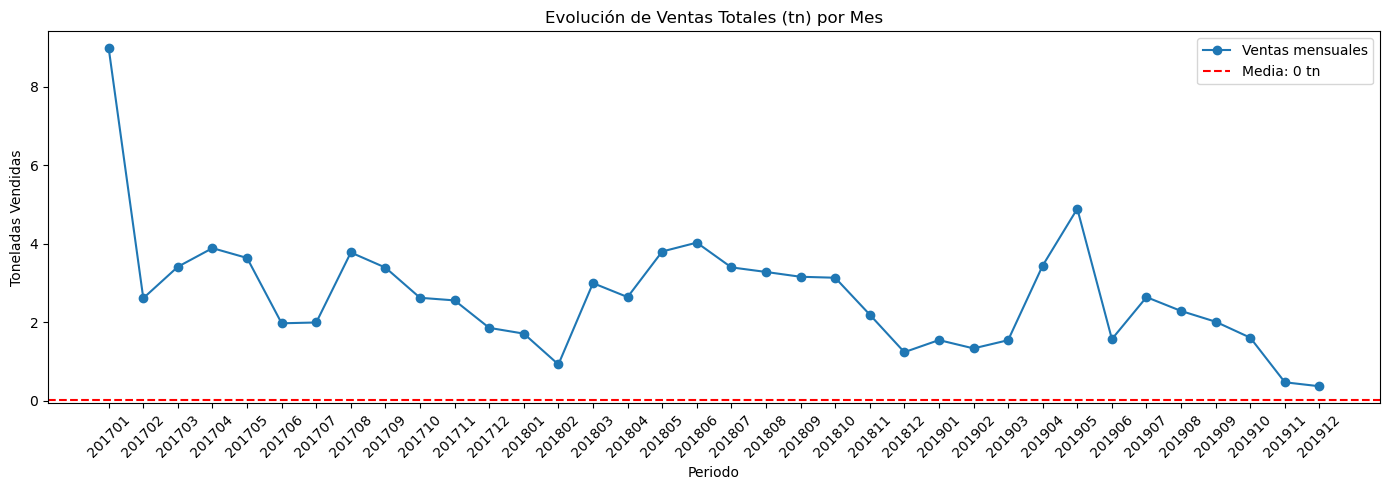

In [91]:
display(productos[productos['cat1'] == 'REF'])


ventas_cat_REF = df[df['cat1'] == 'REF']
media_ventas = ventas_cat_REF['tn'].mean()

cat_ventas = ventas_cat_REF.groupby(['periodo'])['tn'].sum().reset_index()
cat_ventas['periodo'] = cat_ventas['periodo'].astype(str)

# Crear gráfico
plt.figure(figsize=(14, 5))

# Línea de ventas por mes
plt.plot(
    cat_ventas['periodo'].astype(str),
    cat_ventas['tn'],
    marker='o',
    label='Ventas mensuales'
)

# Línea horizontal con la media
plt.axhline(
    y=media_ventas,
    color='red',
    linestyle='--',
    label=f'Media: {media_ventas:.0f} tn'
)

# Estética y leyenda
plt.title("Evolución de Ventas Totales (tn) por Mes")
plt.xlabel("Periodo")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [106]:
productos.cat1.unique()

array(['HC', 'PC', 'FOODS', 'REF'], dtype=object)

In [110]:
# 6. ANÁLISIS POR CATEGORÍA 2
def graficar_cat1(df, cat1):
    # Agrupar por anio_mes, cat1 y cat2, sumando toneladas
    ventas_cat = df.groupby(['periodo', 'cat1', 'cat2'])['tn'].sum().reset_index()
    ventas_cat['periodo'] = ventas_cat['periodo'].astype(str)
    ventas_cat = ventas_cat[ventas_cat['cat1'] == cat1]
    # Crear una columna combinada para mejor visualización
    ventas_cat['cat1_cat2'] = ventas_cat['cat1'].astype(str) + " - " + ventas_cat['cat2'].astype(str)

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=ventas_cat, x='periodo', y='tn', hue='cat1_cat2', marker='o')
    plt.title("Evolución de Ventas por Categoría 1 y 2")
    plt.xlabel("Periodo")
    plt.ylabel("Toneladas Vendidas")
    plt.xticks(rotation=45)
    plt.legend(title='Categoría')
    plt.tight_layout()
    plt.show()

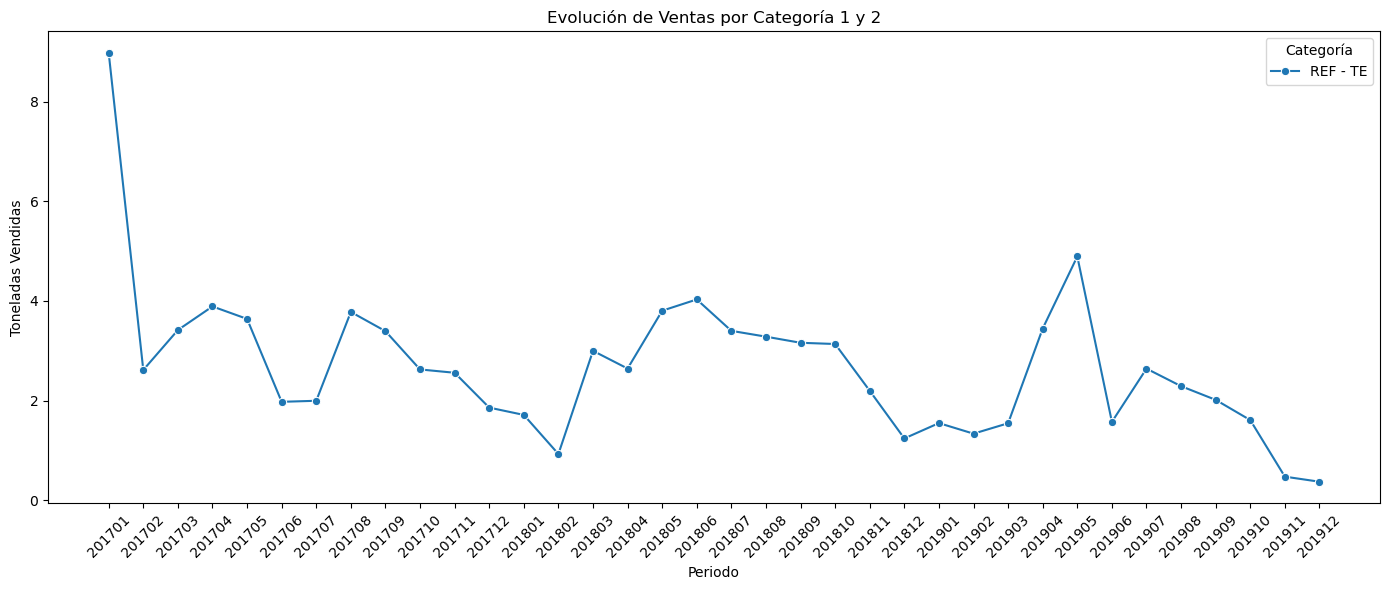

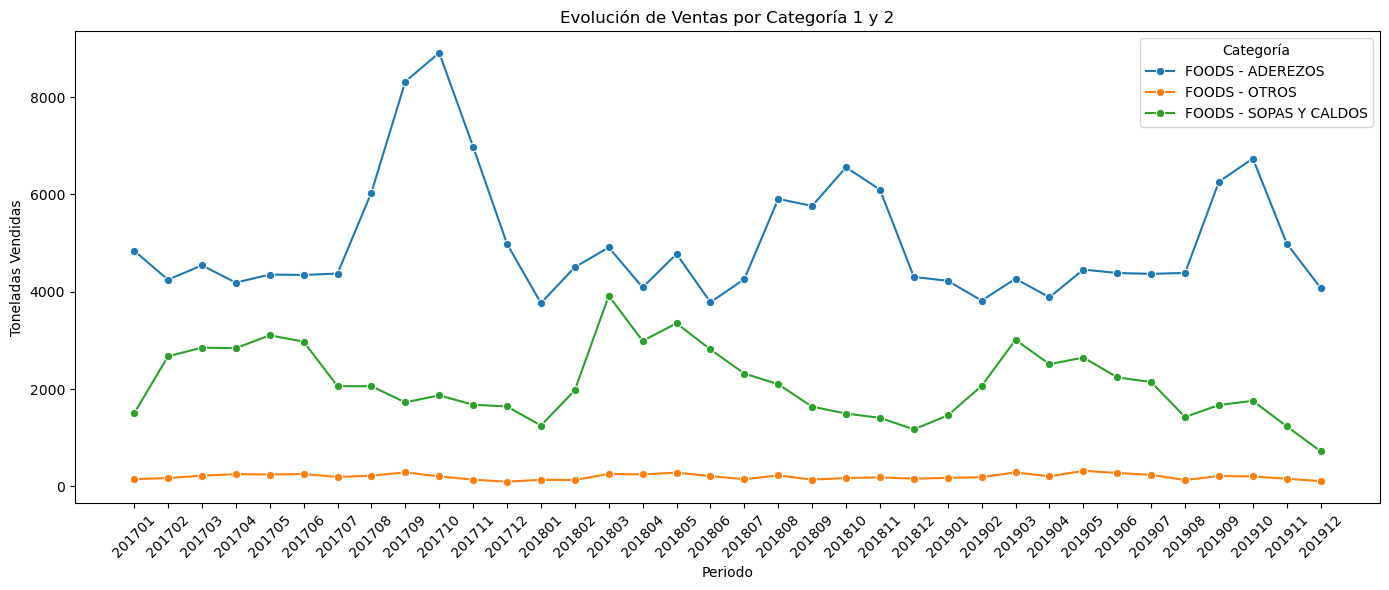

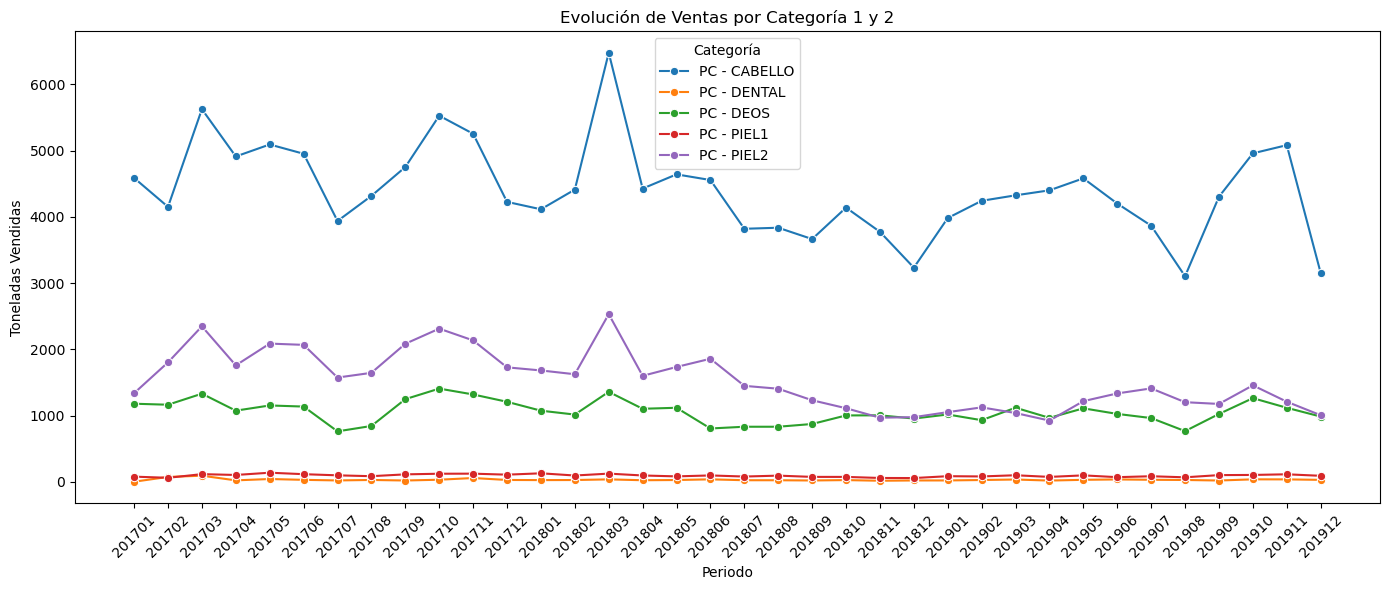

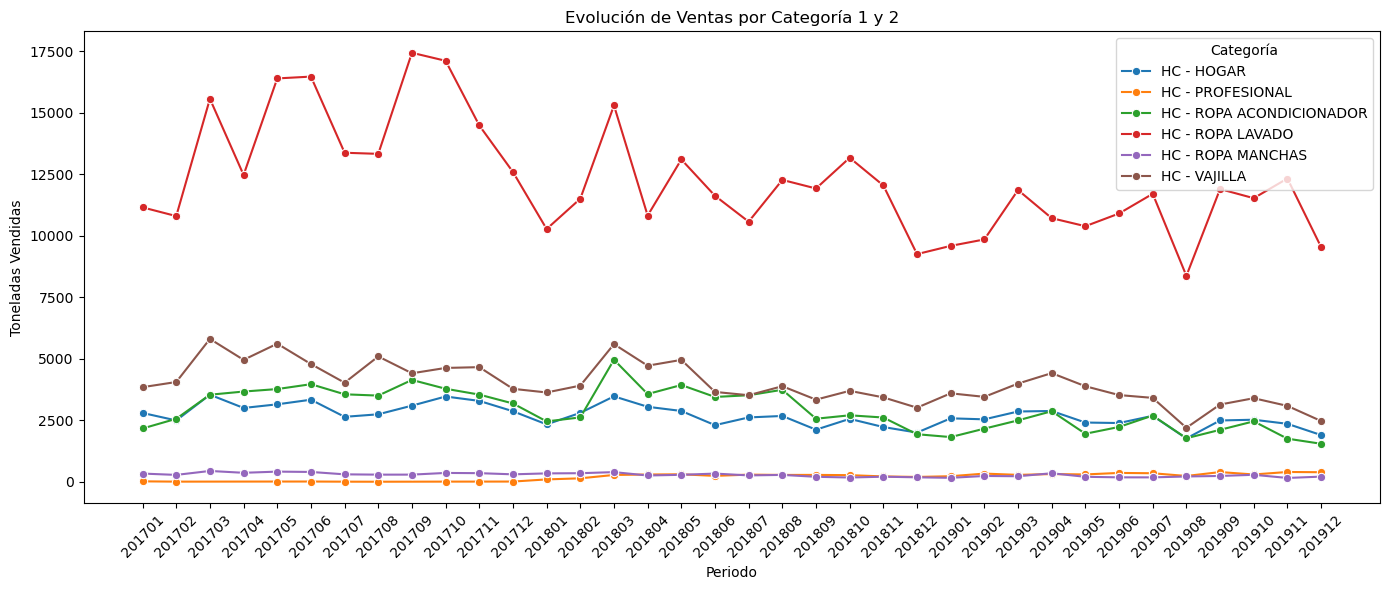

In [113]:
graficar_cat1(df, "REF")
graficar_cat1(df, "FOODS")
graficar_cat1(df, "PC")
graficar_cat1(df, "HC")

In [125]:
def graficar_cat3(df, cat1, cat2):
    # Agrupar por anio_mes, cat1 y cat2, sumando toneladas
    ventas_cat = df.groupby(['periodo', 'cat1', 'cat2','cat3'])['tn'].sum().reset_index()
    ventas_cat = ventas_cat[(ventas_cat['cat1'] == cat1) & (ventas_cat['cat2'] == cat2)]
    # Crear una columna combinada para mejor visualización
    ventas_cat['cat1_cat2_cat3'] = ventas_cat['cat1'].astype(str) + " - " + ventas_cat['cat2'].astype(str) + " - " + ventas_cat['cat3'].astype(str)

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=ventas_cat, x='periodo', y='tn', hue='cat1_cat2_cat3', marker='o')
    plt.title("Evolución de Ventas por Categoría 1, 2 y 3")
    plt.xlabel("Periodo")
    plt.ylabel("Toneladas Vendidas")
    plt.xticks(rotation=45)
    plt.legend(title='Categoría')
    plt.tight_layout()
    plt.show()

In [137]:
import math

def graficar_cat3_en_columnas(df, cat1, cat2):
    # Agrupar por periodo, cat1, cat2, cat3
    ventas_cat = df[(df['cat1'] == cat1) & (df['cat2'] == cat2)]
    ventas_cat = ventas_cat.groupby(['periodo', 'cat1', 'cat2','cat3'])['tn'].sum().reset_index()
    ventas_cat['periodo_dt'] = pd.to_datetime(ventas_cat['periodo'].astype(str), format='%Y%m')

    # Obtener lista de cat3 únicos
    cat3_unicos = ventas_cat['cat3'].unique()
    n = len(cat3_unicos)
    n_cols = 2
    n_rows = math.ceil(n / n_cols)

    # Crear grid de subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows), sharex=True)
    axes = axes.flatten()

    for i, cat3 in enumerate(cat3_unicos):
        df_filtrado = ventas_cat[ventas_cat['cat3'] == cat3]

        sns.lineplot(
            data=df_filtrado,
            x='periodo_dt',
            y='tn',
            marker='o',
            ax=axes[i]
        )
        axes[i].set_title(f"{cat1} - {cat2} - {cat3}")
        axes[i].set_xlabel("Periodo")
        axes[i].set_ylabel("Toneladas")
        axes[i].tick_params(axis='x', rotation=45, labelbottom=True)

    # Ocultar ejes vacíos si los hay
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

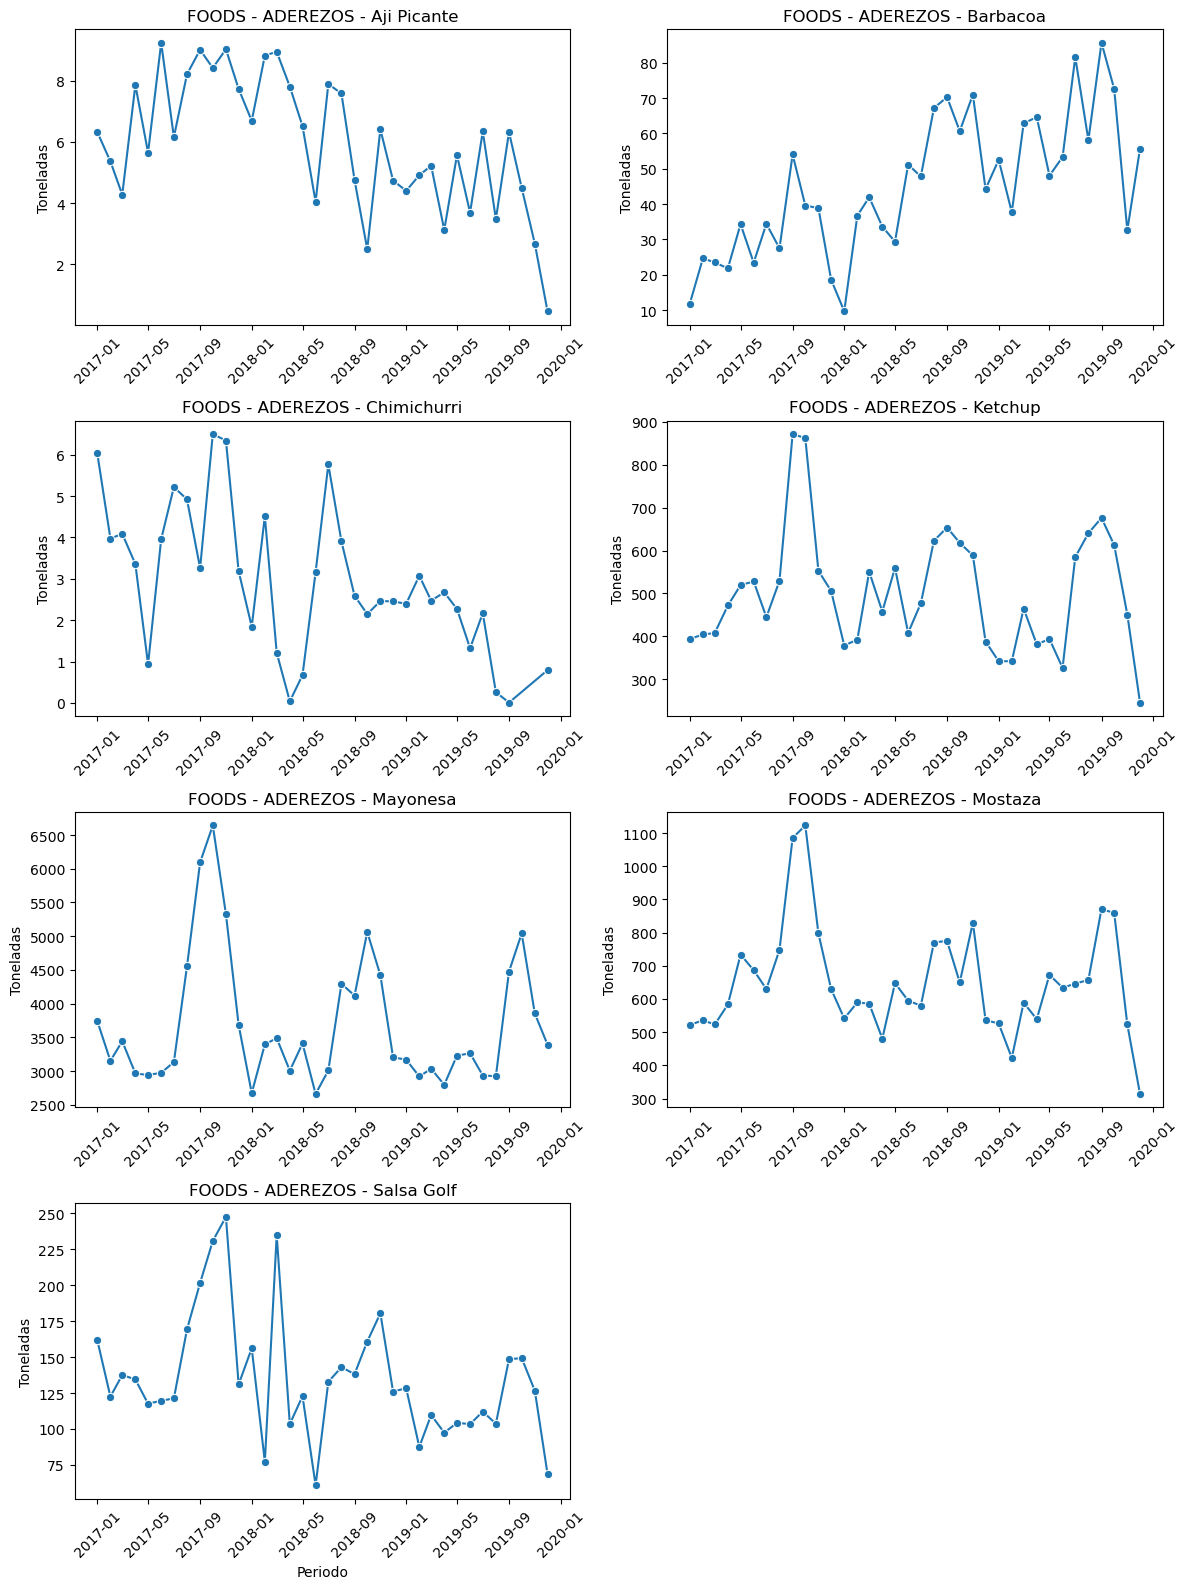

In [138]:
graficar_cat3_en_columnas(df, "FOODS", "ADEREZOS")

In [152]:
def recorrer_cat1_cat2(df):
    combinaciones = df[['cat1', 'cat2']].drop_duplicates()
    combinaciones = combinaciones.dropna(subset=['cat1'])  # 👈 Elimina donde cat1 es NaN
    
    for _, fila in combinaciones.iterrows():
        cat1 = fila['cat1']
        cat2 = fila['cat2']
        print(f"\n📊 Generando gráfico para: cat1 = {cat1} | cat2 = {cat2}")
        graficar_cat3_en_columnas(df, cat1, cat2)

In [151]:
display(df.isna().sum())
df[df['cat1'].isna()].head(1)
print("Tenemos 7448 productos en sellin que no estan productos")

periodo                        0
customer_id                    0
product_id                     0
plan_precios_cuidados          0
cust_request_qty               0
cust_request_tn                0
tn                             0
cat1                        7448
cat2                        7448
cat3                        7448
brand                       7448
sku_size                    7448
stock_final              1814301
anio                           0
mes                            0
dtype: int64

Tenemos 7448 productos en sellin que no estan productos


In [141]:
combinaciones = df[['cat1', 'cat2']].drop_duplicates()
combinaciones

cat1                 cat2
0         HC              VAJILLA
171       PC                 DEOS
363    FOODS       SOPAS Y CALDOS
495       HC                HOGAR
811       HC          PROFESIONAL
813    FOODS             ADEREZOS
1125   FOODS                OTROS
1440      PC                PIEL2
1590      PC                PIEL1
1978      HC  ROPA ACONDICIONADOR
5847      HC          ROPA LAVADO
6125      PC              CABELLO
7089      HC         ROPA MANCHAS
8342     NaN                  NaN
73453    REF                   TE
78782     PC               DENTAL


📊 Generando gráfico para: cat1 = HC | cat2 = VAJILLA


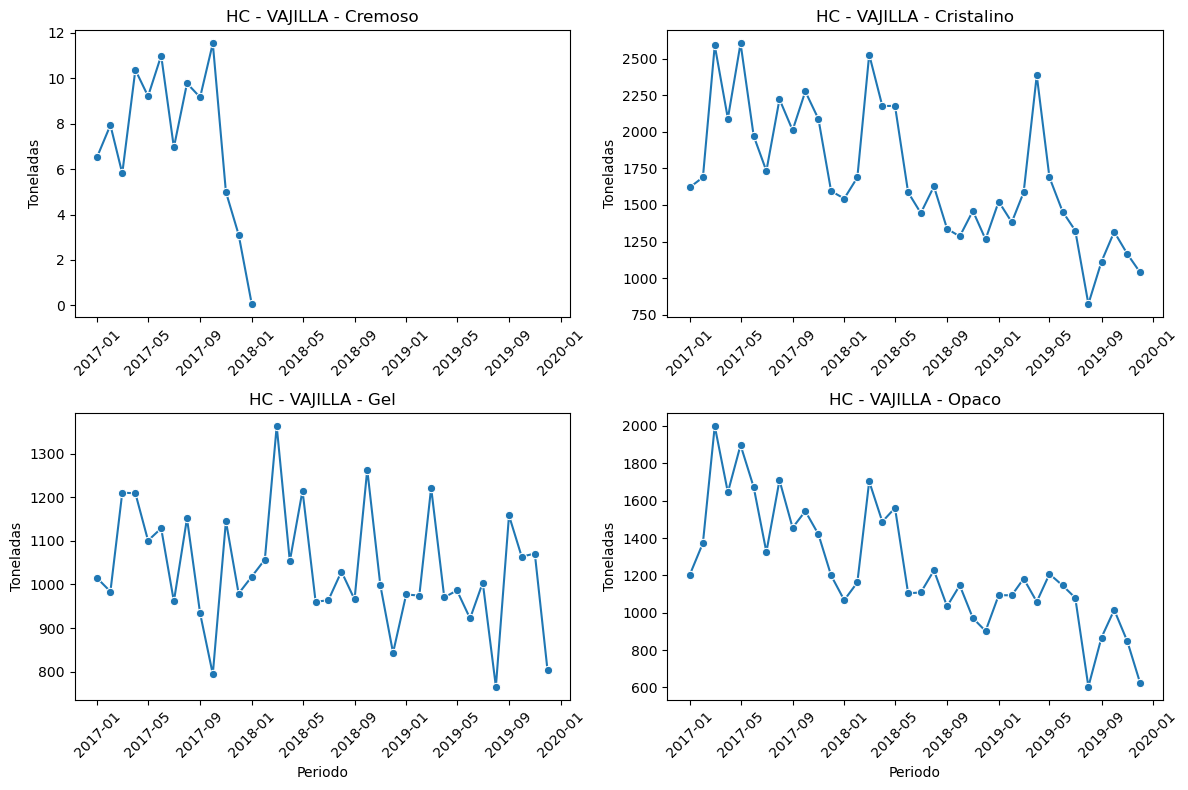


📊 Generando gráfico para: cat1 = PC | cat2 = DEOS


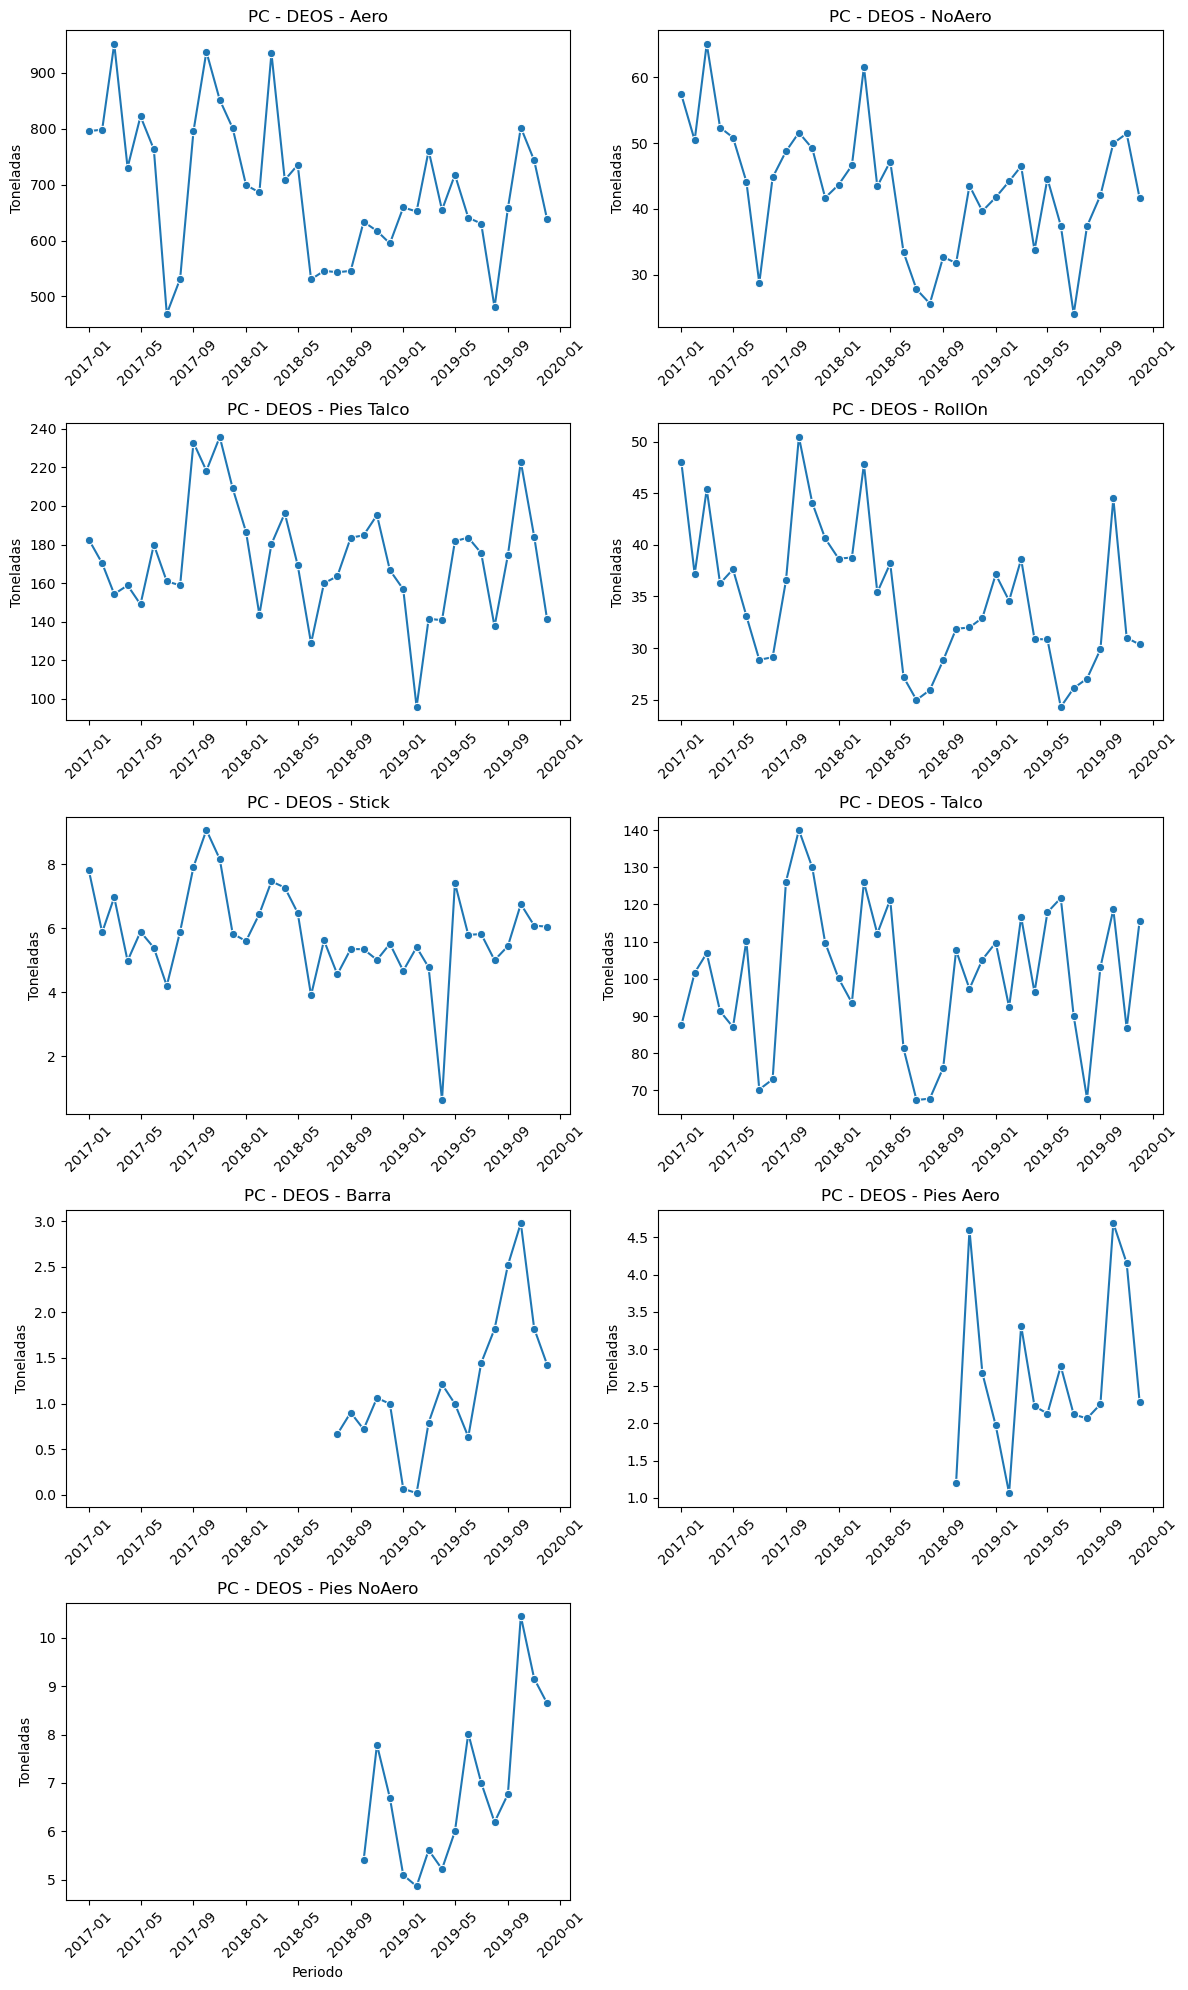


📊 Generando gráfico para: cat1 = FOODS | cat2 = SOPAS Y CALDOS


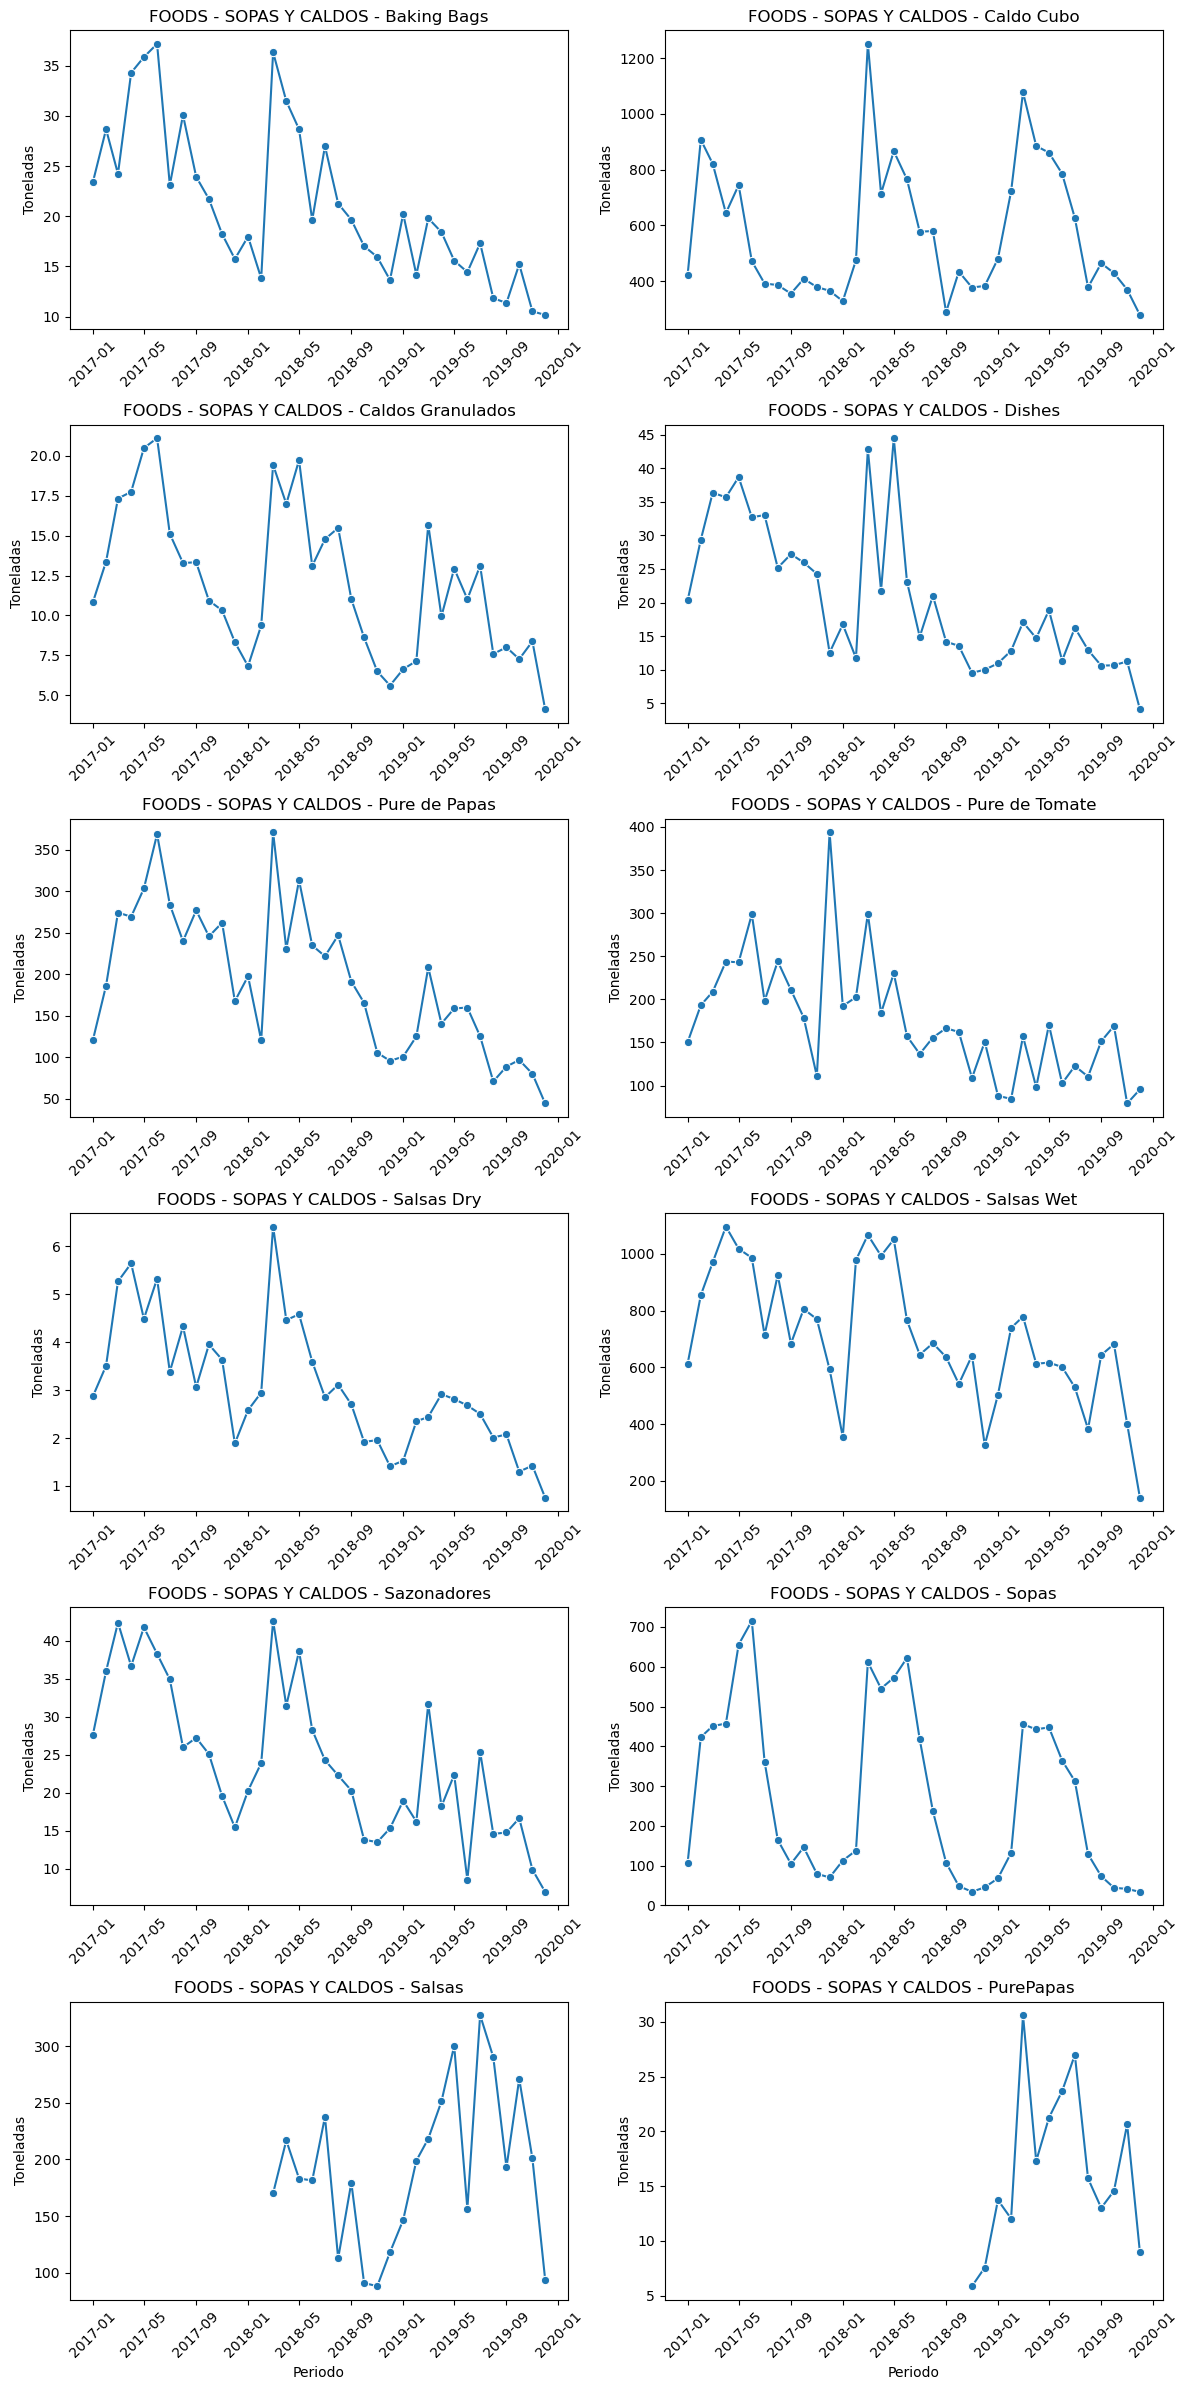


📊 Generando gráfico para: cat1 = HC | cat2 = HOGAR


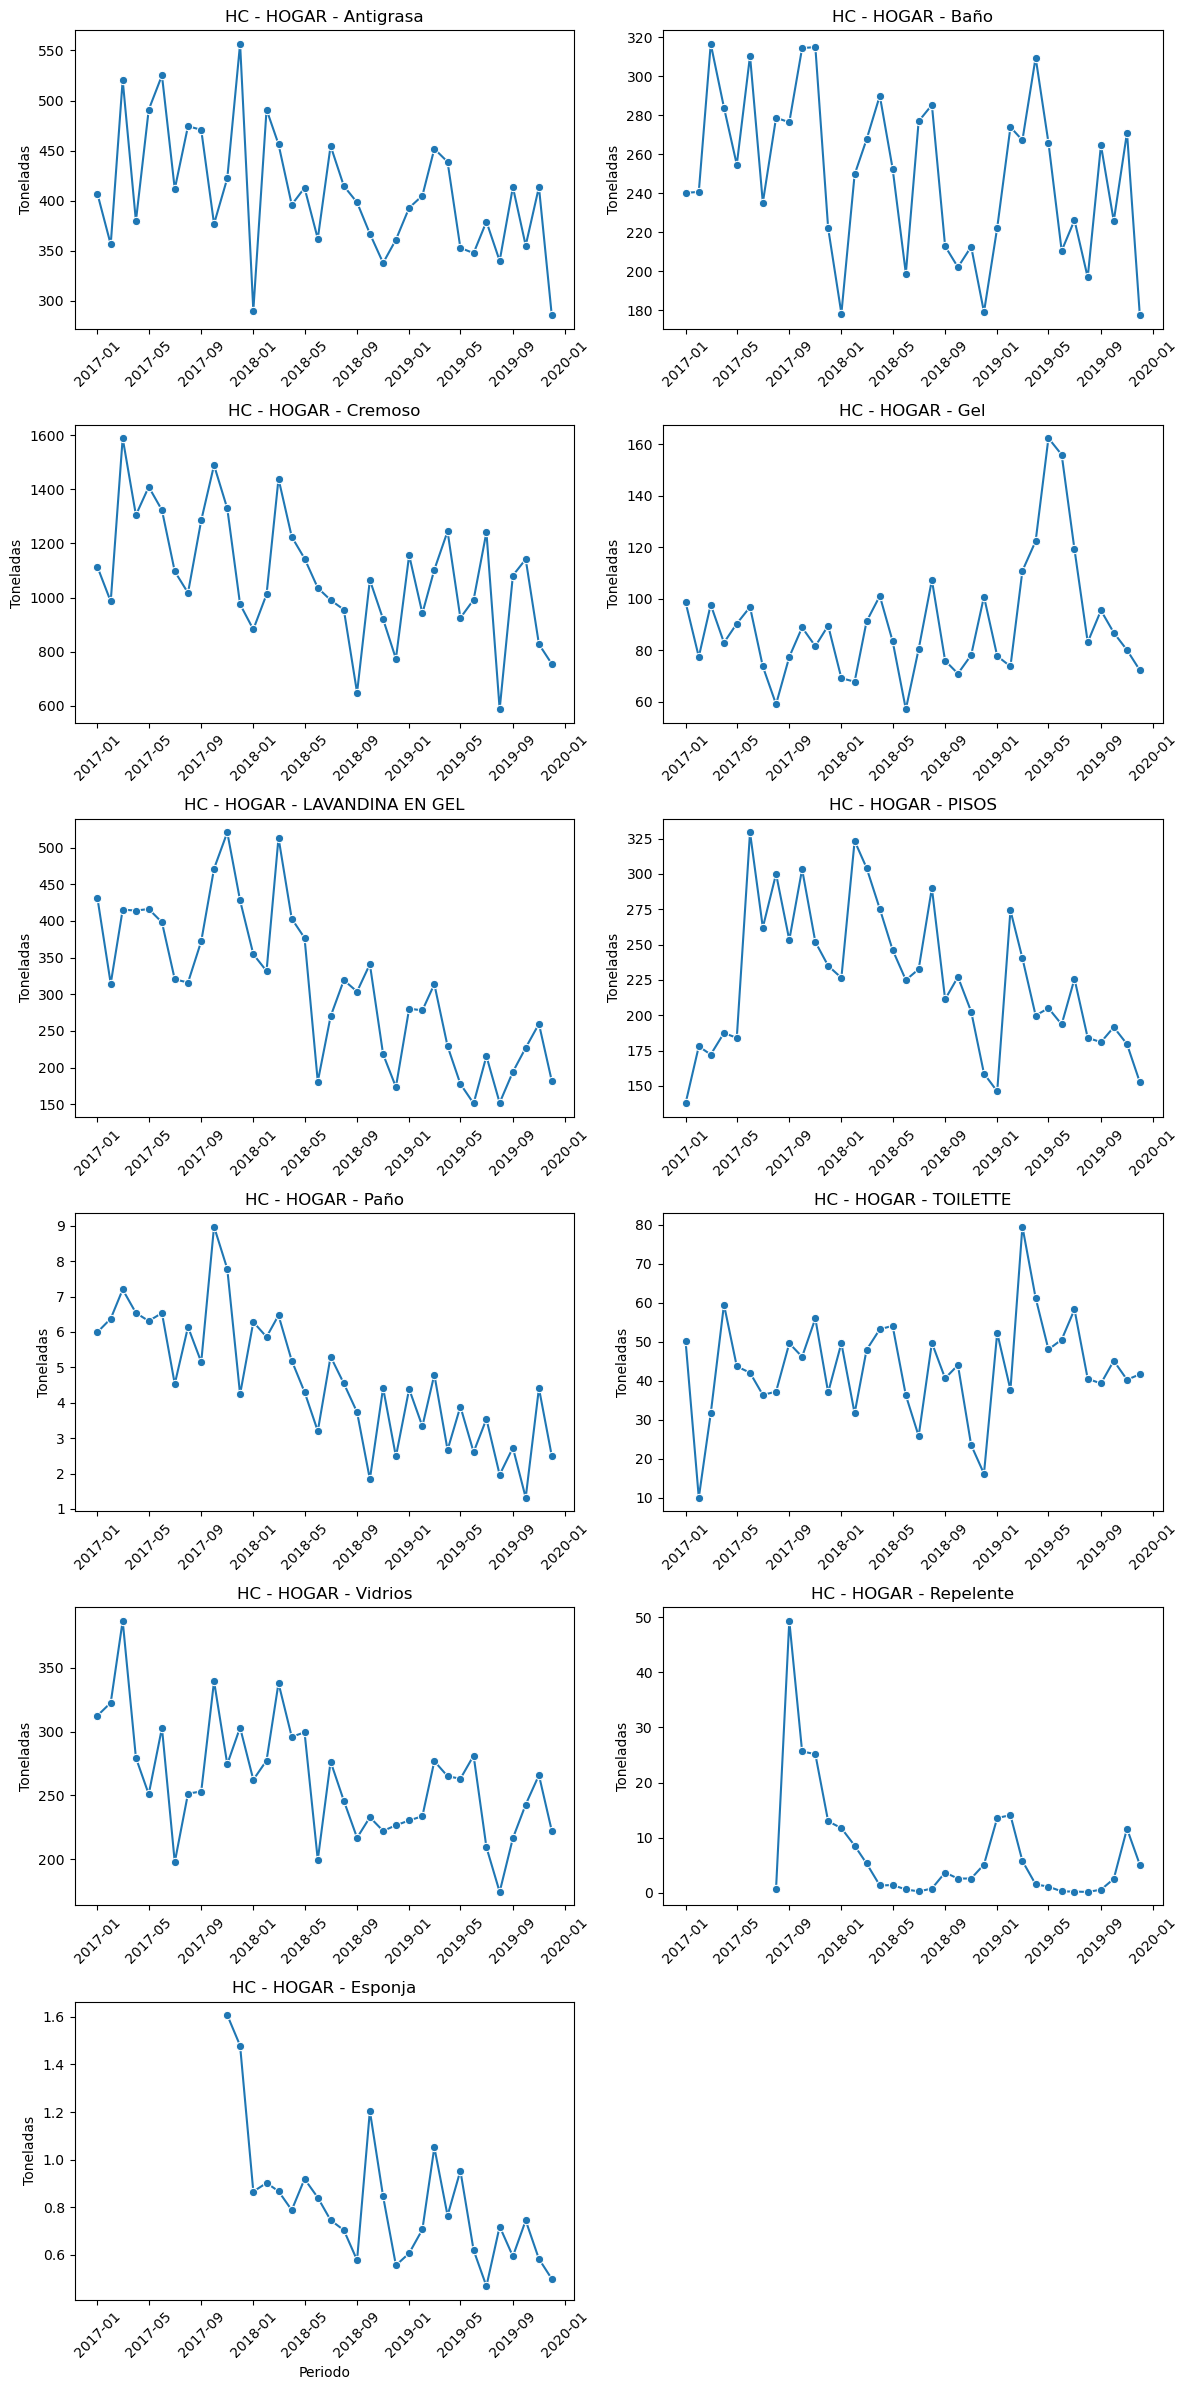


📊 Generando gráfico para: cat1 = HC | cat2 = PROFESIONAL


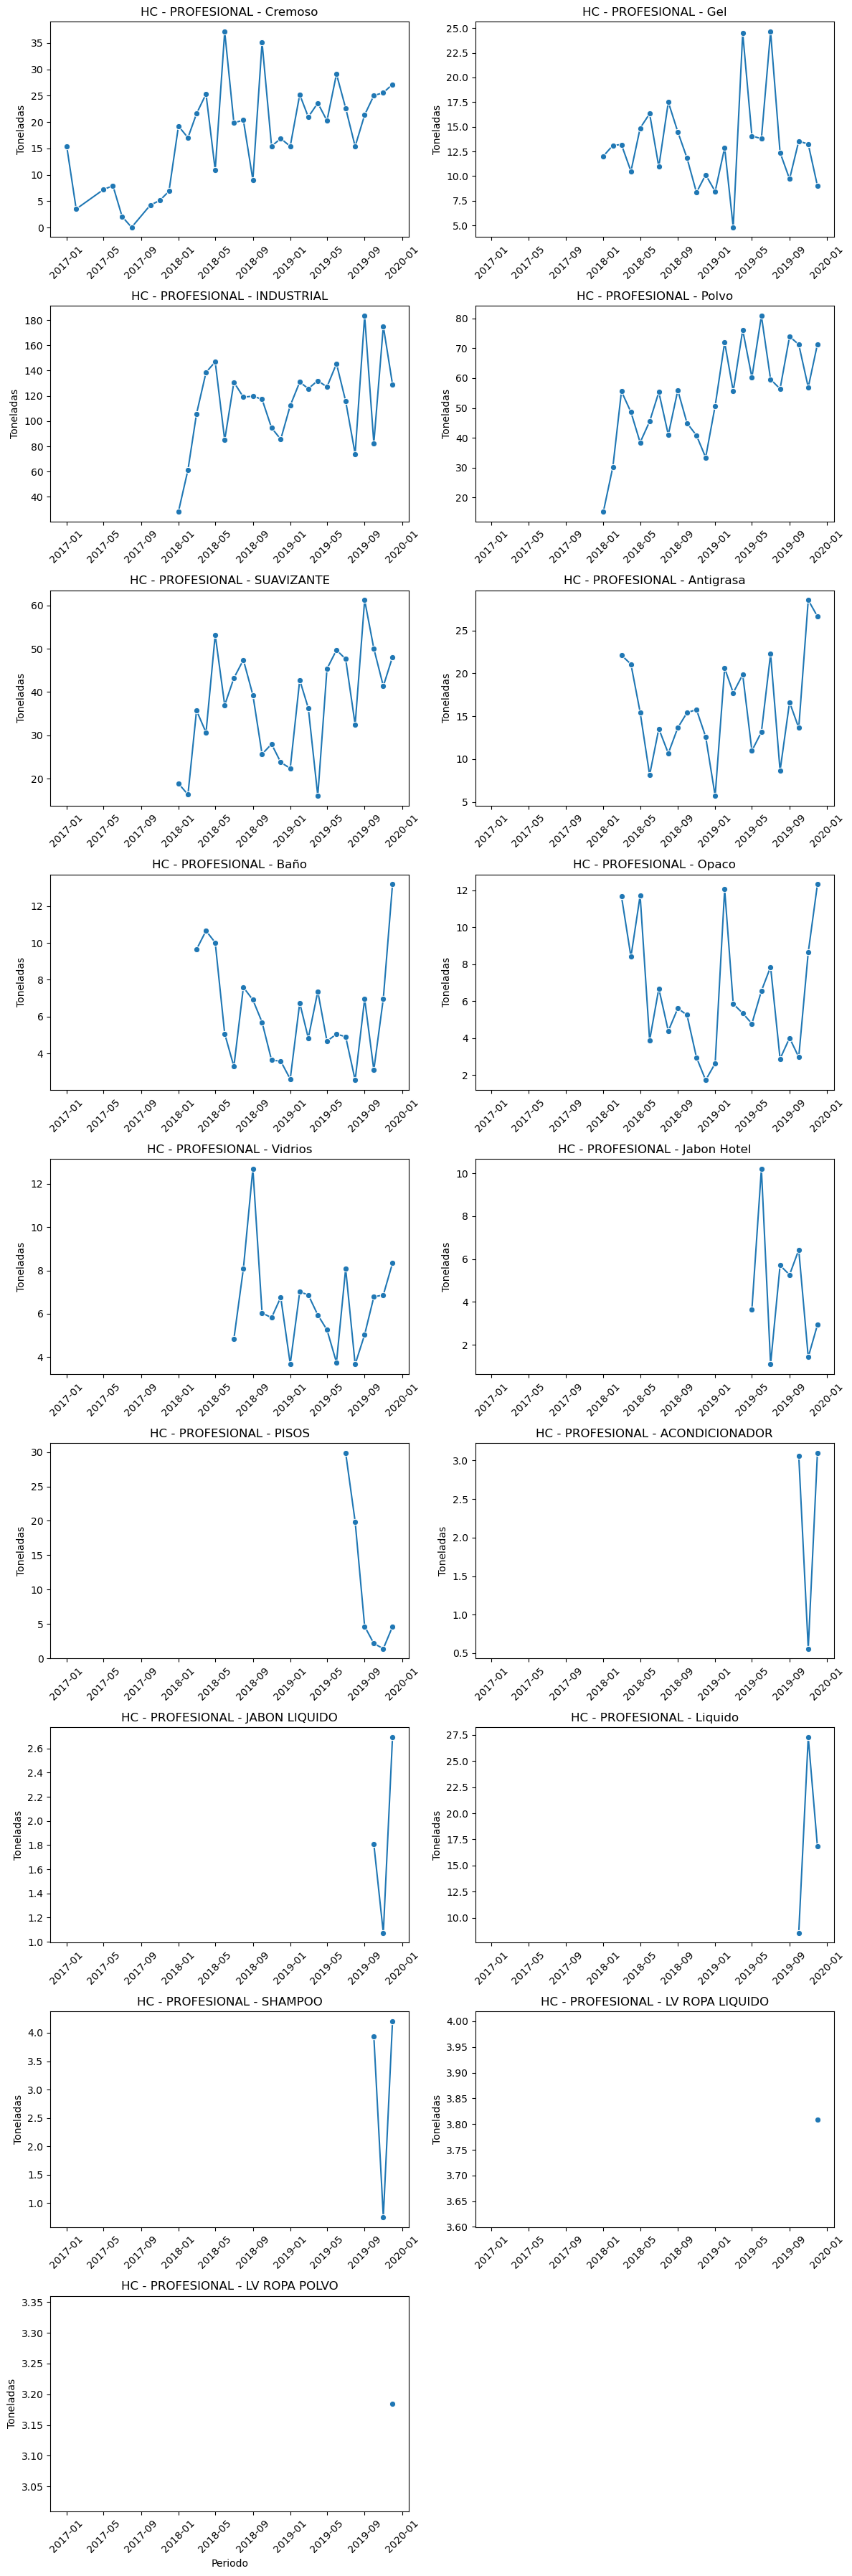


📊 Generando gráfico para: cat1 = FOODS | cat2 = ADEREZOS


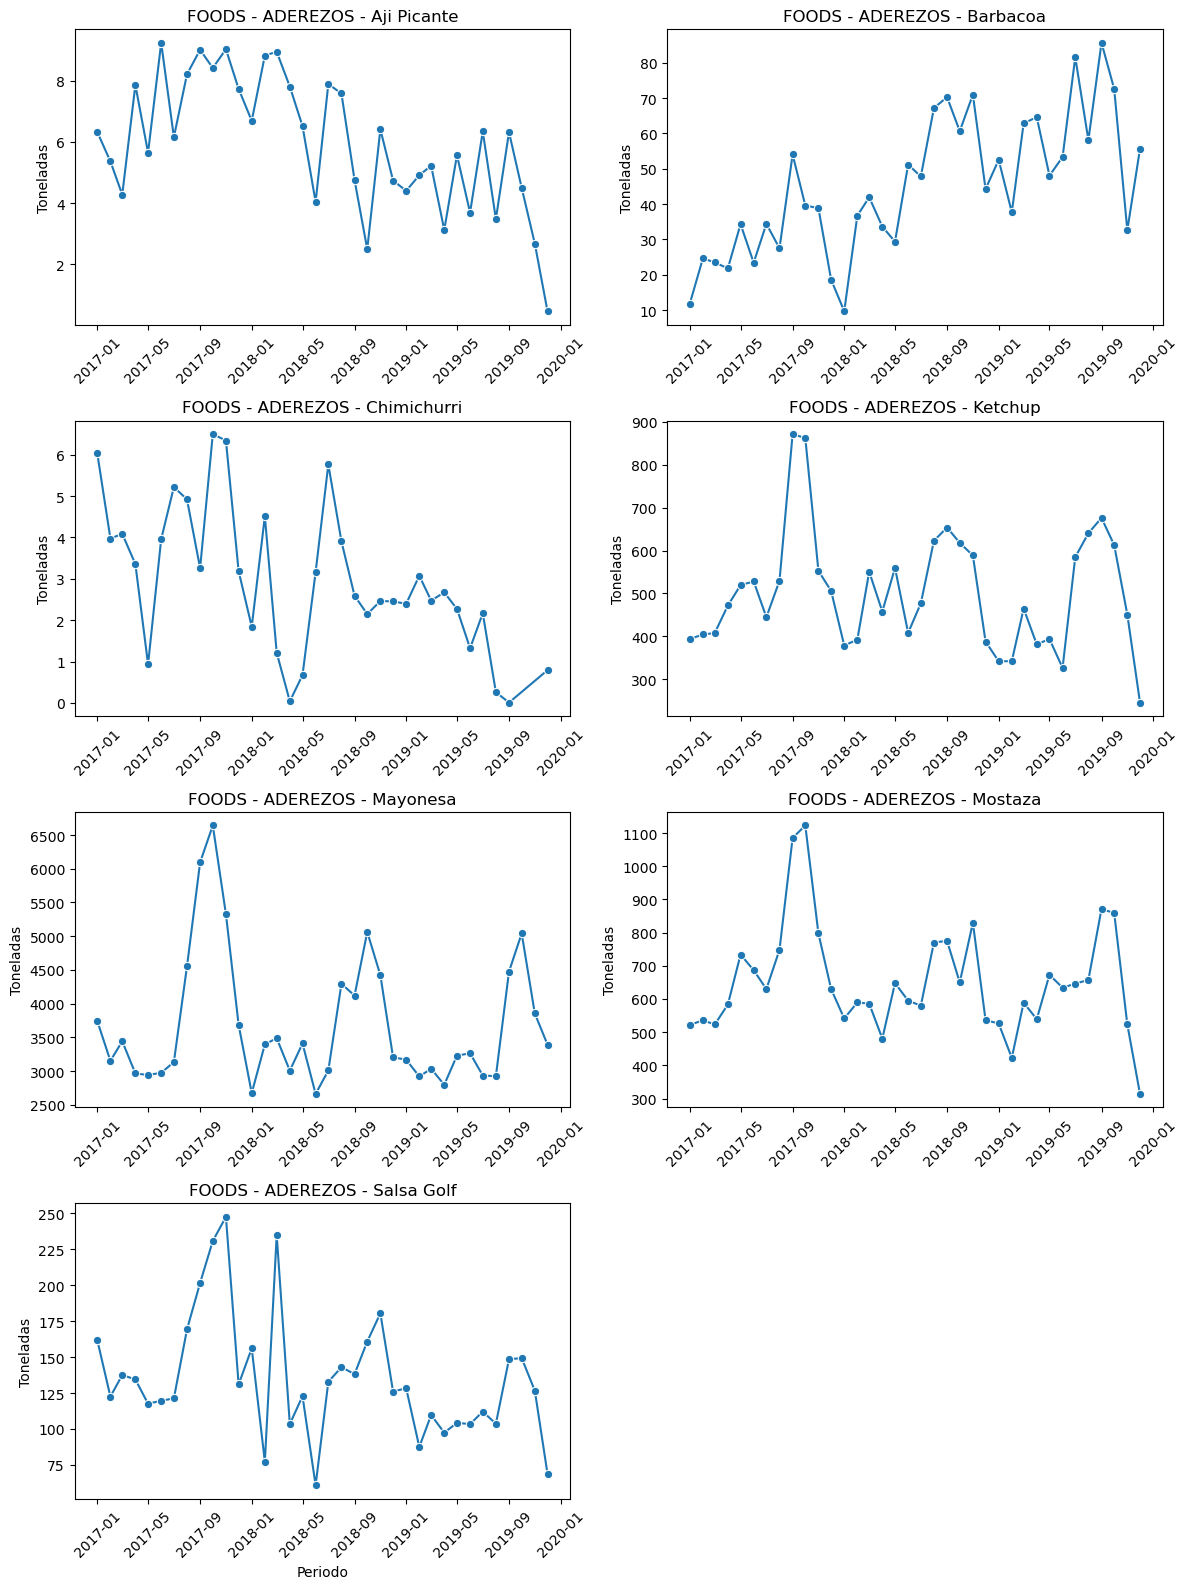


📊 Generando gráfico para: cat1 = FOODS | cat2 = OTROS


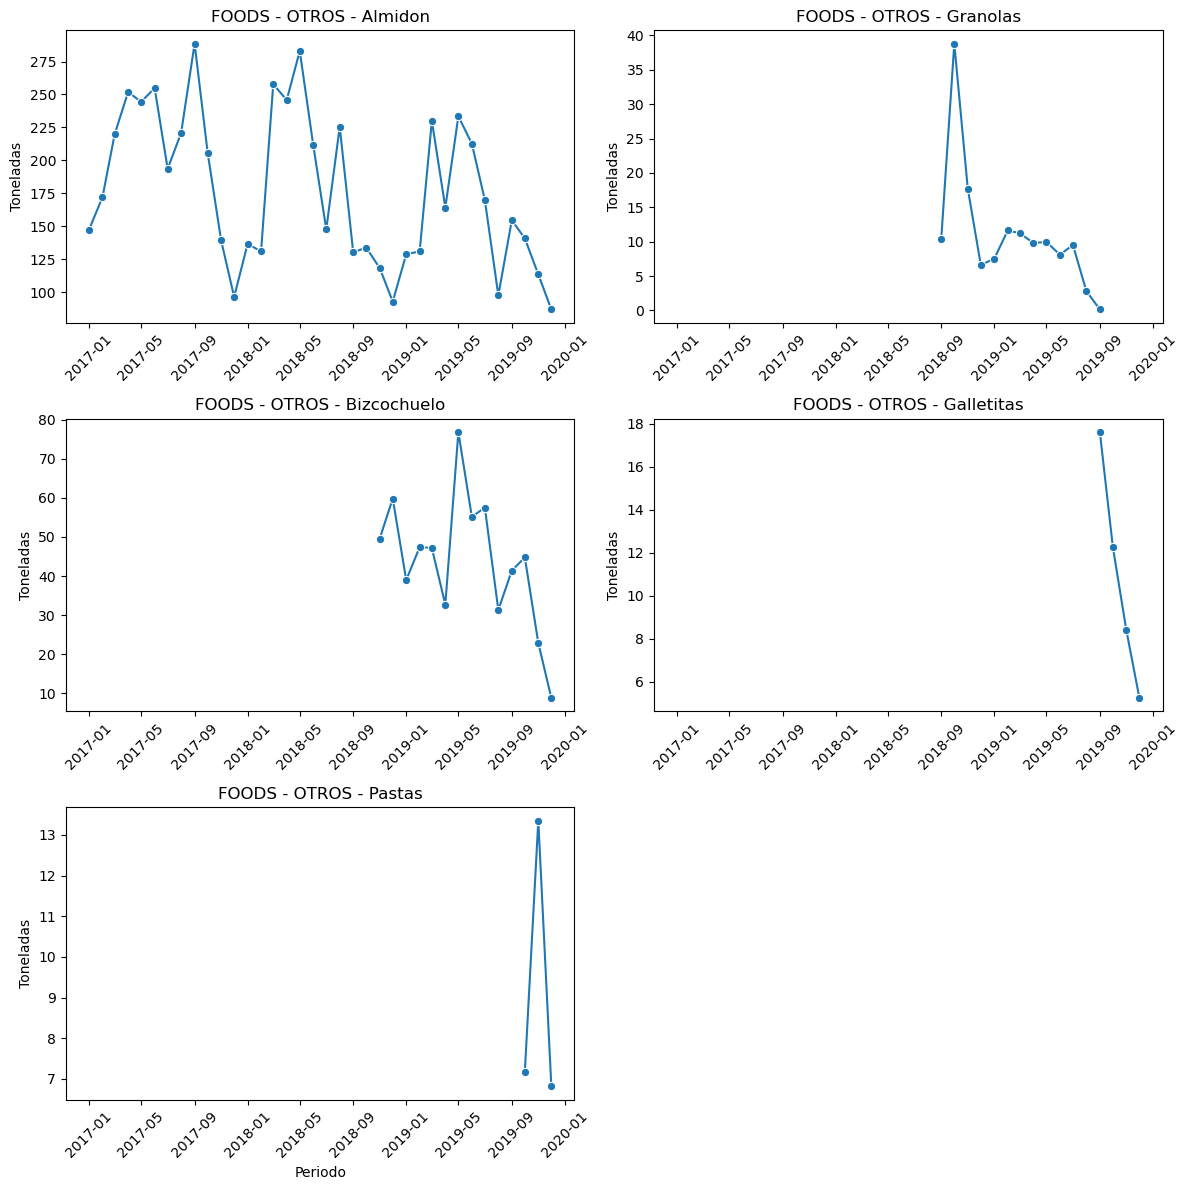


📊 Generando gráfico para: cat1 = PC | cat2 = PIEL2


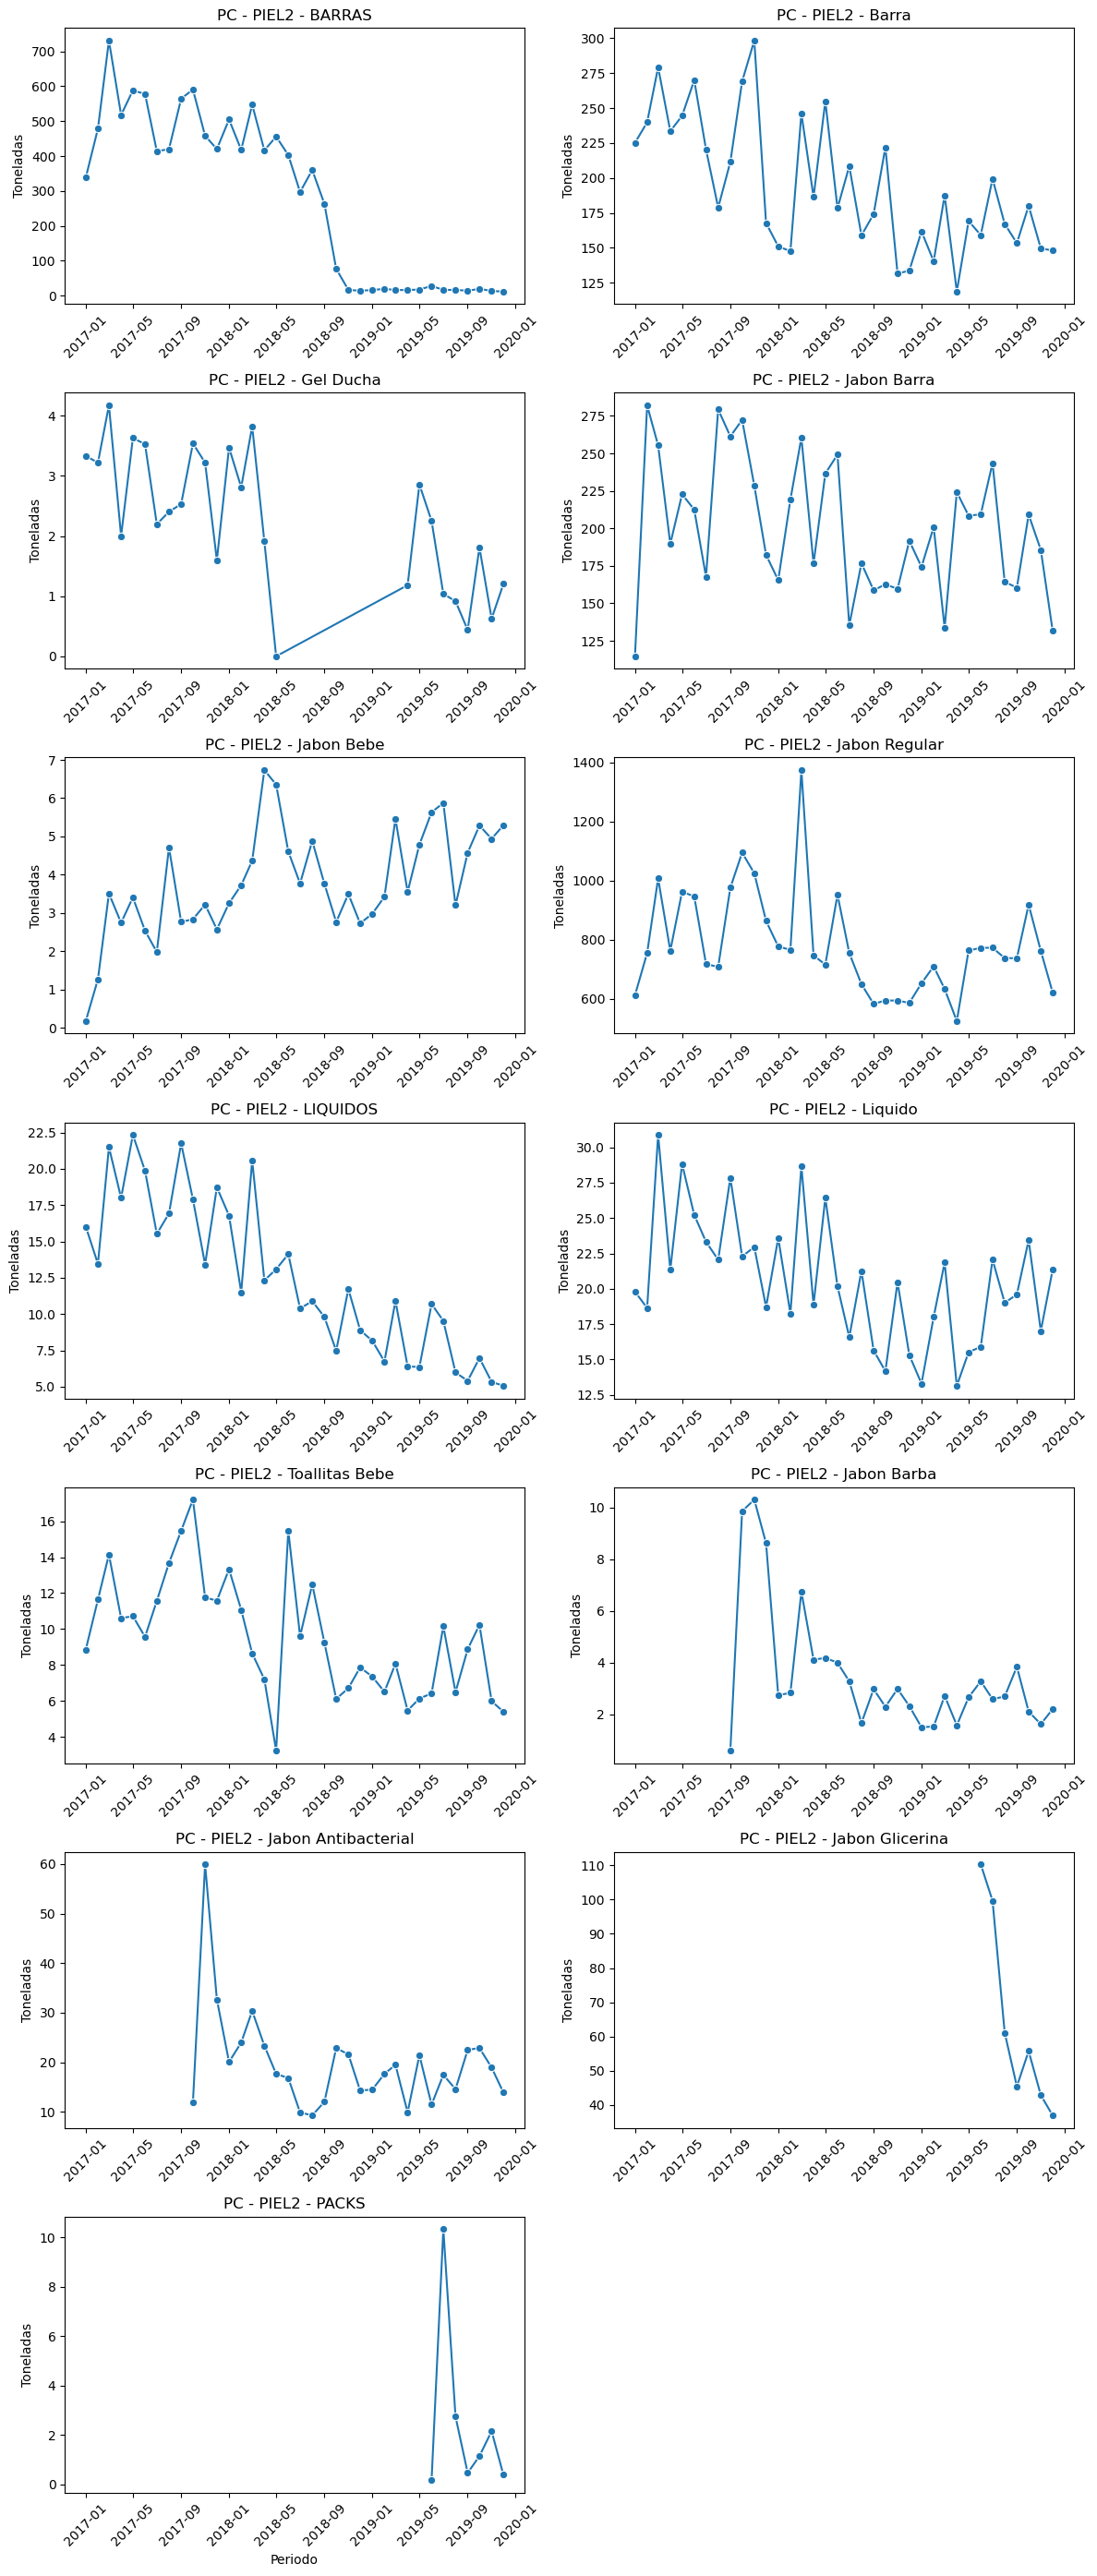


📊 Generando gráfico para: cat1 = PC | cat2 = PIEL1


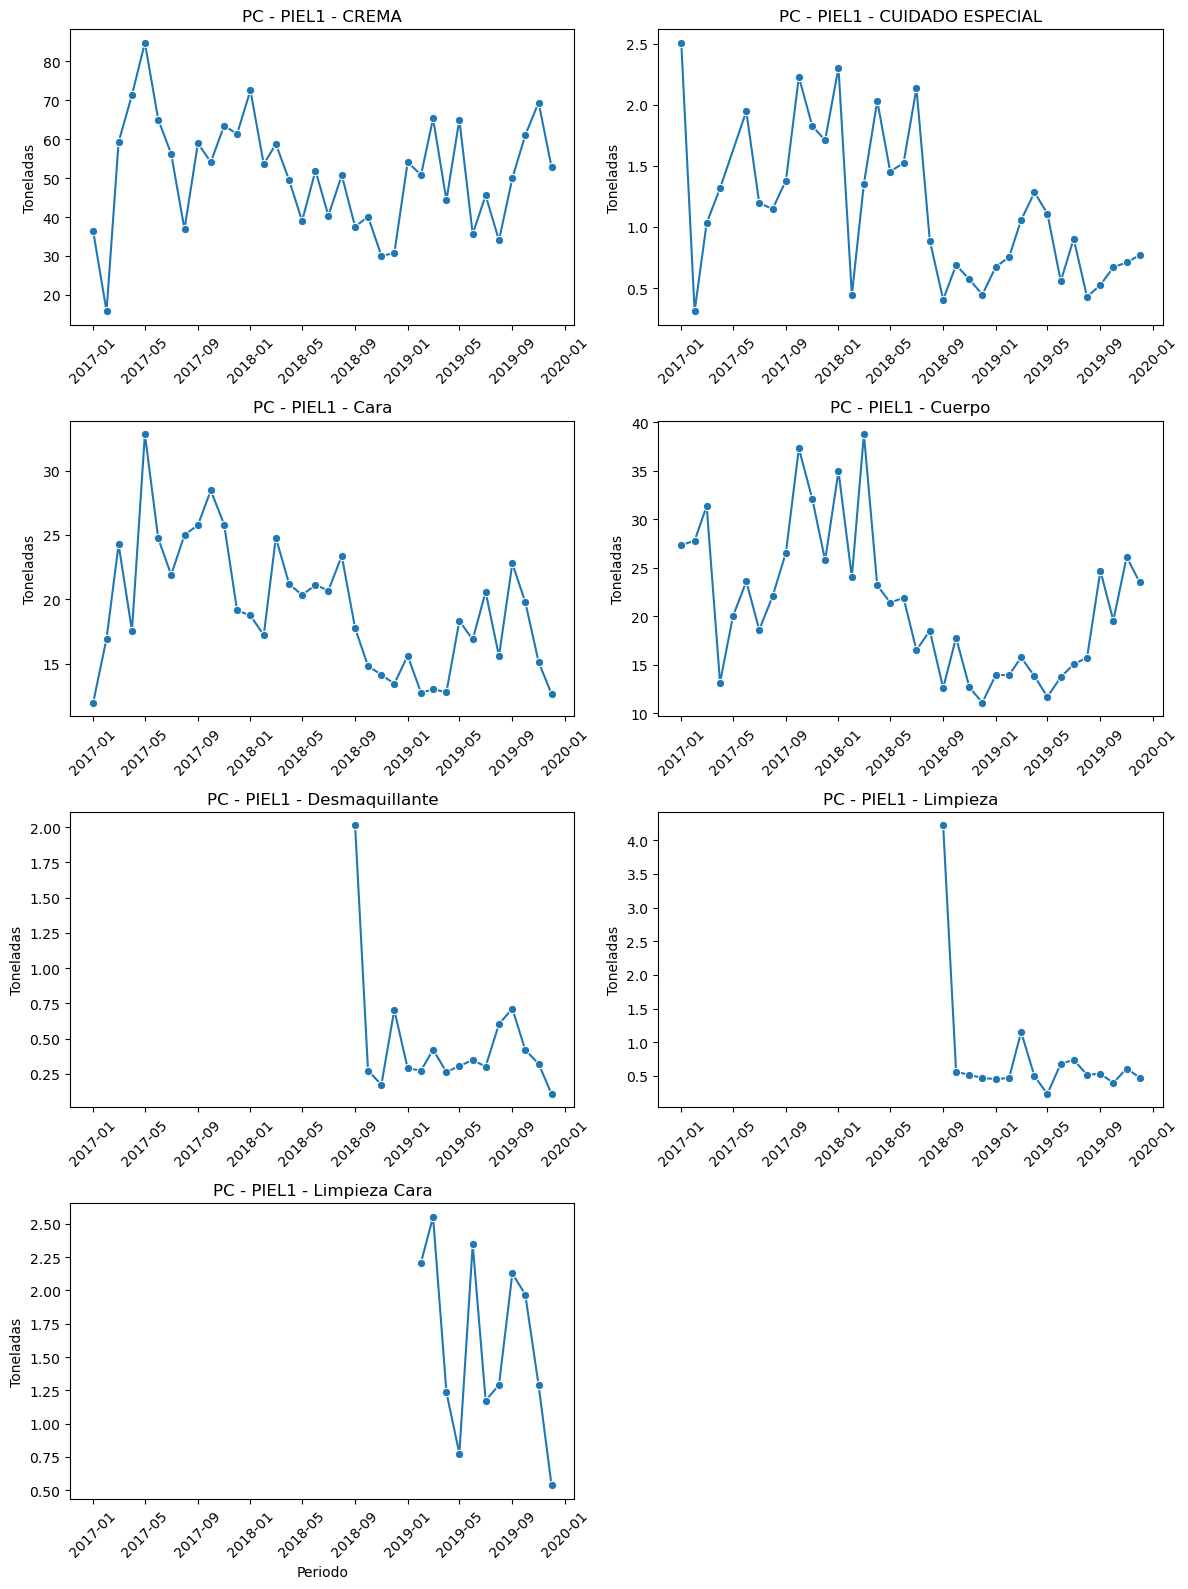


📊 Generando gráfico para: cat1 = HC | cat2 = ROPA ACONDICIONADOR


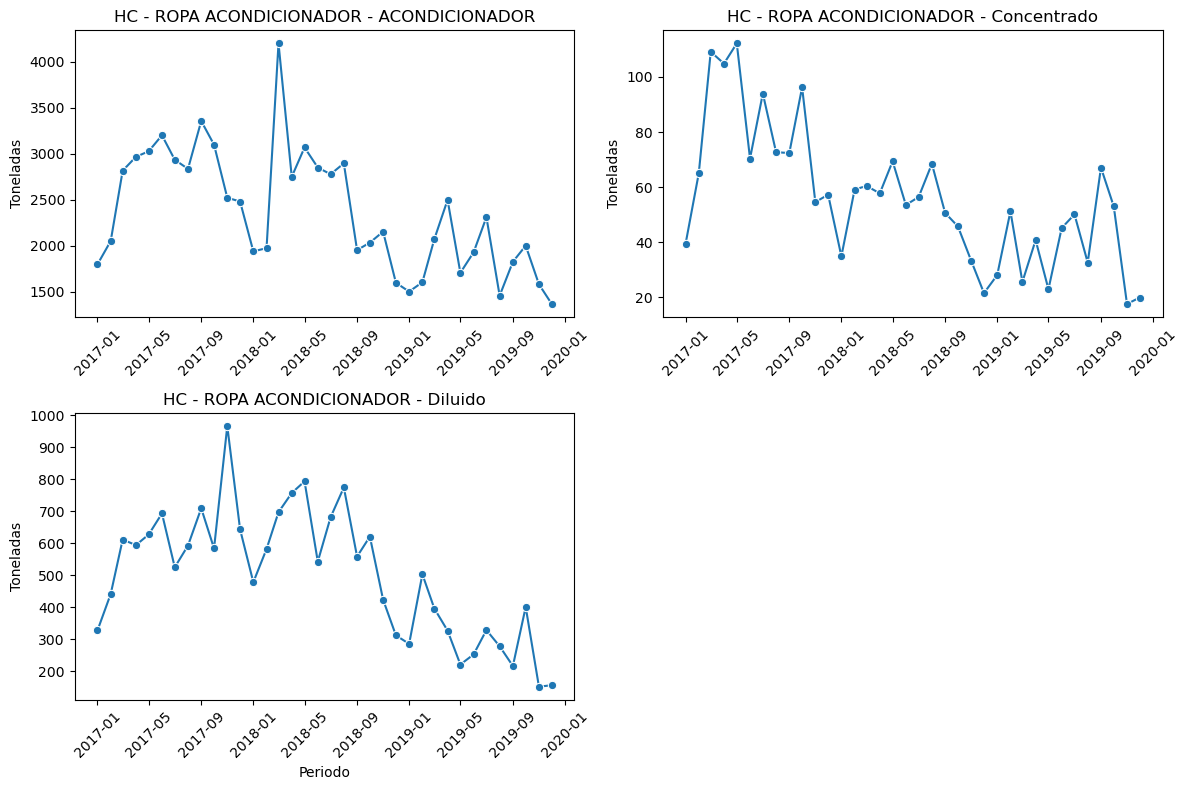


📊 Generando gráfico para: cat1 = HC | cat2 = ROPA LAVADO


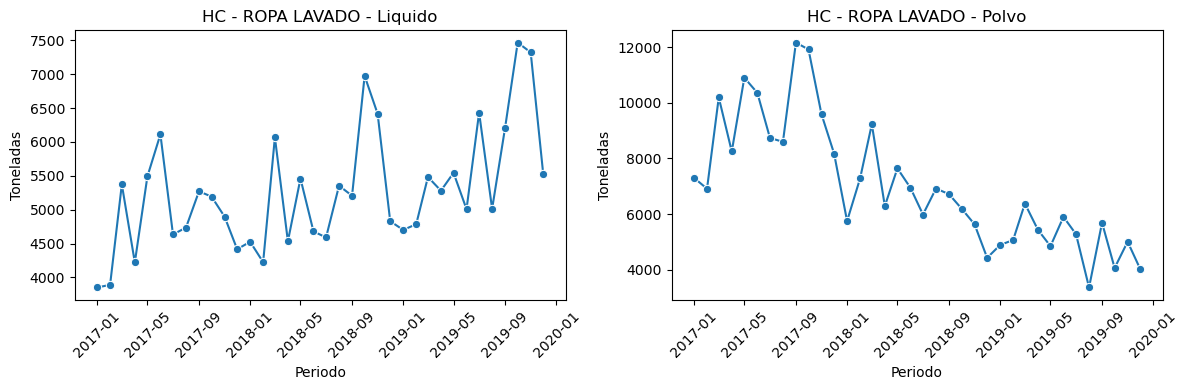


📊 Generando gráfico para: cat1 = PC | cat2 = CABELLO


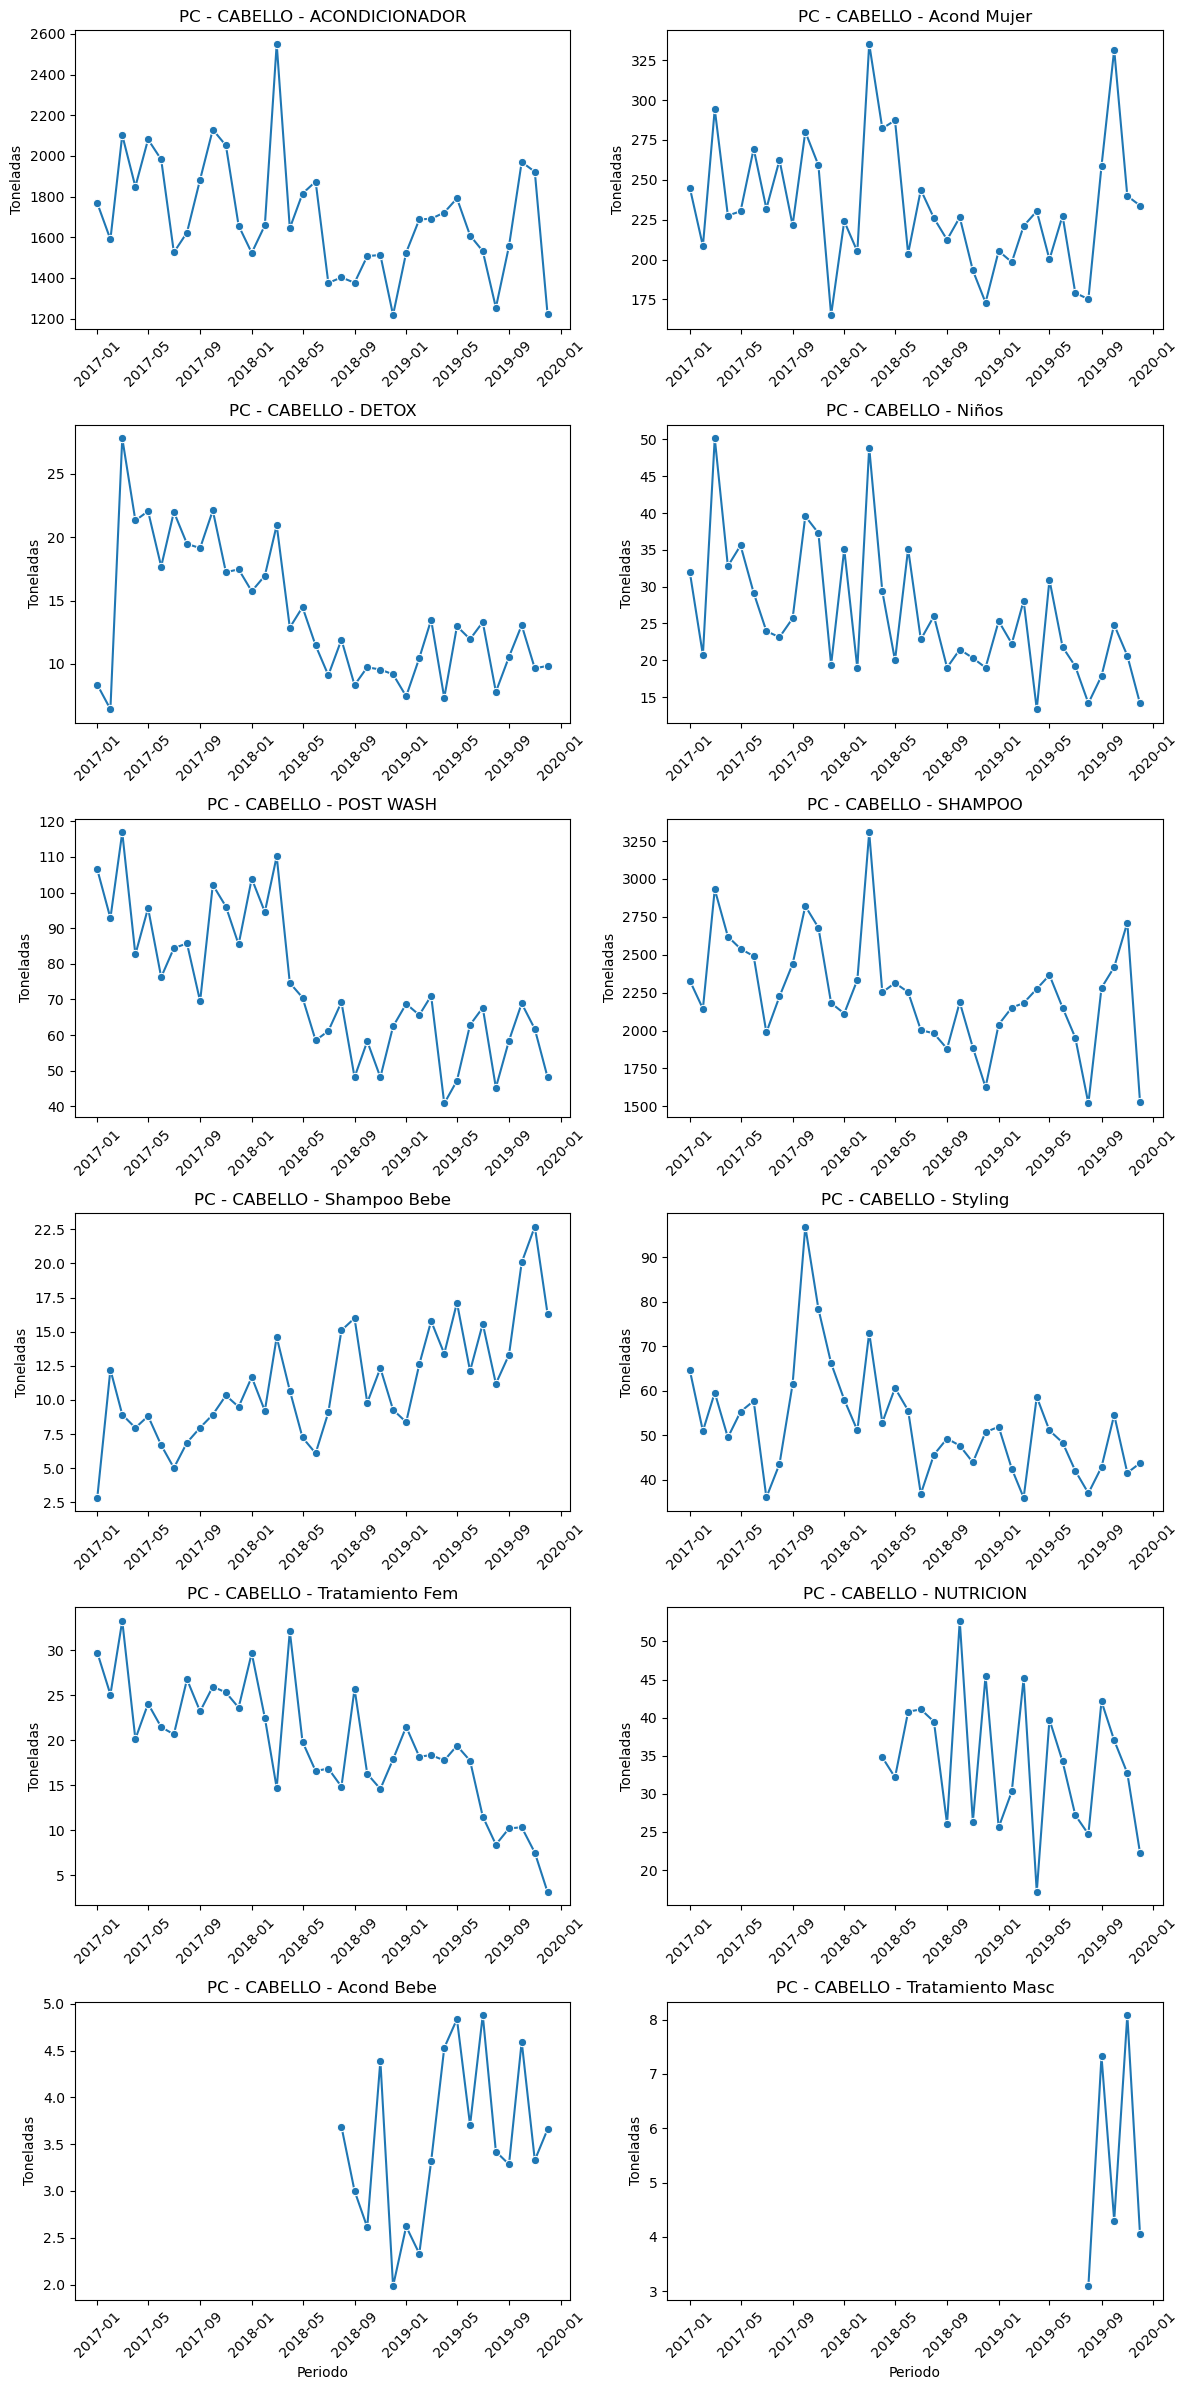


📊 Generando gráfico para: cat1 = HC | cat2 = ROPA MANCHAS


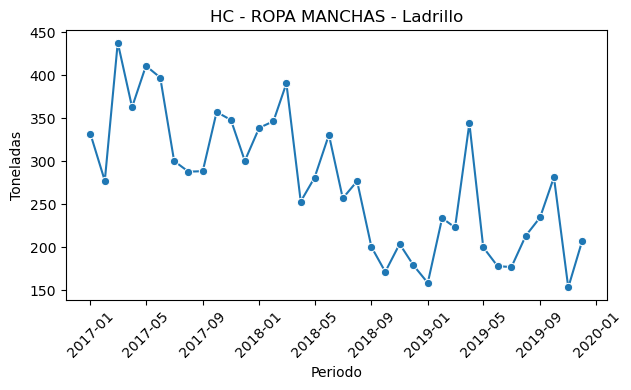


📊 Generando gráfico para: cat1 = REF | cat2 = TE


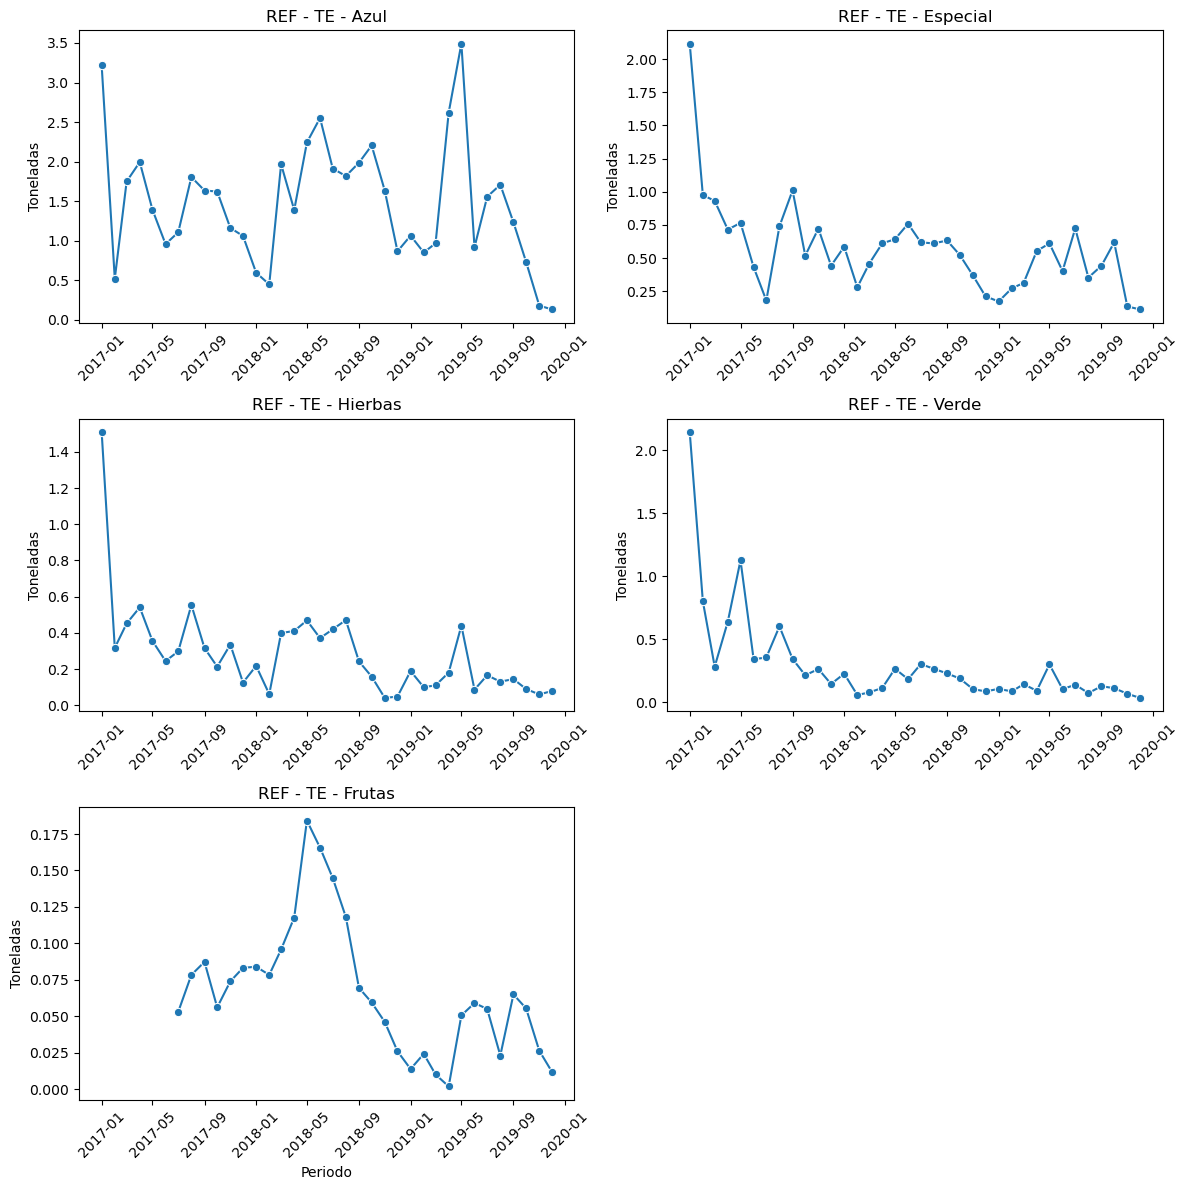


📊 Generando gráfico para: cat1 = PC | cat2 = DENTAL


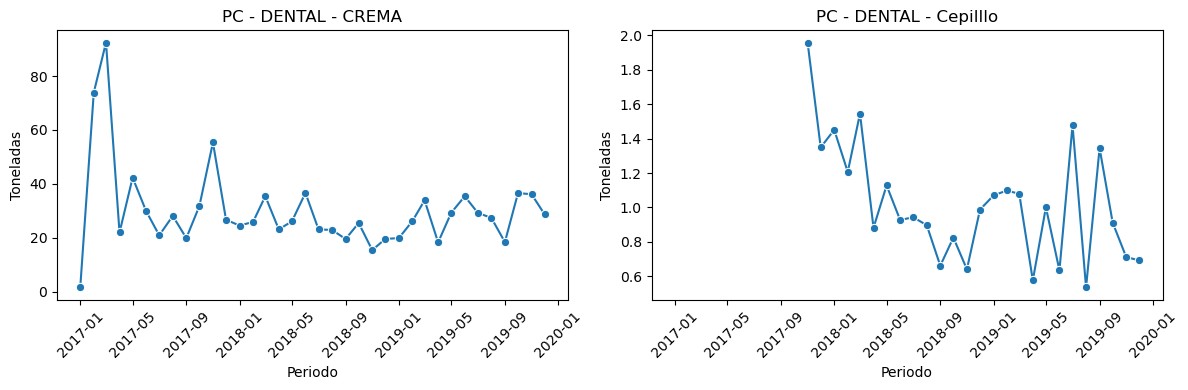

In [153]:
recorrer_cat1_cat2(df)

In [159]:
conteo_productos = productos[productos['cat1'] == 'FOODS']
conteo_productos = conteo_productos.groupby(['cat1', 'cat2', 'cat3'])['product_id'].nunique().reset_index()
conteo_productos.rename(columns={'product_id': 'cantidad_productos'}, inplace=True)
conteo_productos.sort_values(by='cantidad_productos', ascending=False)

cat1            cat2               cat3  cantidad_productos
23  FOODS  SOPAS Y CALDOS              Sopas                  46
4   FOODS        ADEREZOS           Mayonesa                  36
13  FOODS  SOPAS Y CALDOS         Caldo Cubo                  18
22  FOODS  SOPAS Y CALDOS        Sazonadores                  15
5   FOODS        ADEREZOS            Mostaza                  14
15  FOODS  SOPAS Y CALDOS             Dishes                  11
10  FOODS           OTROS           Granolas                  10
14  FOODS  SOPAS Y CALDOS  Caldos Granulados                  10
3   FOODS        ADEREZOS            Ketchup                   9
21  FOODS  SOPAS Y CALDOS         Salsas Wet                   9
12  FOODS  SOPAS Y CALDOS        Baking Bags                   8
8   FOODS           OTROS        Bizcochuelo                   5
19  FOODS  SOPAS Y CALDOS             Salsas                   5
20  FOODS  SOPAS Y CALDOS         Salsas Dry                   5
6   FOODS        ADEREZOS         Salsa Golf                   5
16  FOODS  SOPAS Y CALDOS      Pure de Papas                   4
11  FOODS           OTROS             Pastas                   3
1   FOODS        ADEREZOS           Barbacoa                   3
9   FOODS           OTROS         Galletitas                   3
7   FOODS           OTROS            Almidon                   2
17  FOODS  SOPAS Y CALDOS     Pure de Tomate                   1
18  FOODS  SOPAS Y CALDOS          PurePapas                   1
2   FOODS        ADEREZOS        Chimichurri                   1
0   FOODS        ADEREZOS        Aji Picante                   1

Cuantos id_producto hay por categoria cat3

In [171]:

def graficar_productos_vendidos_x_cat3(df,cat1):
    # Filtrar por cat1
    conteo_productos = df[df['cat1'] == cat1]

    # Agrupar y contar productos únicos
    conteo_productos = (
        conteo_productos
        .groupby(['cat1', 'cat2', 'cat3'])['product_id']
        .nunique()
        .reset_index()
        .rename(columns={'product_id': 'cantidad_productos'})
    )

    # Crear etiqueta combinada
    conteo_productos['categoria_completa'] = (
        conteo_productos['cat1'].astype(str) + ' / ' +
        conteo_productos['cat2'].astype(str) + ' / ' +
        conteo_productos['cat3'].astype(str)
    )

    # Ordenar
    conteo_productos = conteo_productos.sort_values(by='cantidad_productos', ascending=True)

    # Plot
    plt.figure(figsize=(10, 0.4 * len(conteo_productos)))  # Altura ajustable según cantidad
    sns.barplot(
        data=conteo_productos,
        x='cantidad_productos',
        y='categoria_completa',
        palette='Blues_d'
    )
    plt.title(f"N° de productos únicos por categoría (cat1 = {cat1})")
    plt.xlabel("Cantidad de productos")
    plt.ylabel("Categoría (cat1 / cat2 / cat3)")
    plt.tight_layout()
    plt.show()


C:\Users\iparra\AppData\Local\Temp\ipykernel_14948\2217968868.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


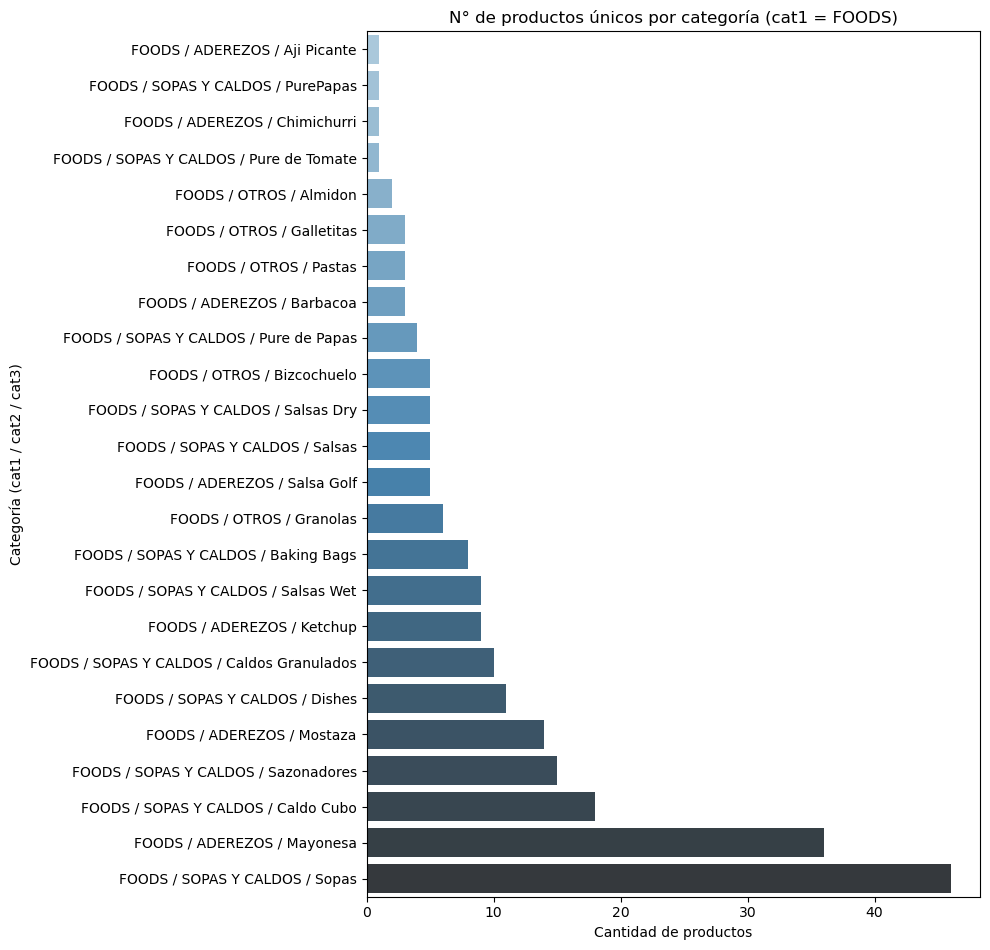

C:\Users\iparra\AppData\Local\Temp\ipykernel_14948\2217968868.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


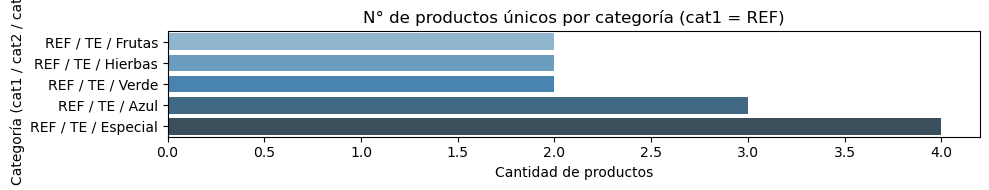

C:\Users\iparra\AppData\Local\Temp\ipykernel_14948\2217968868.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


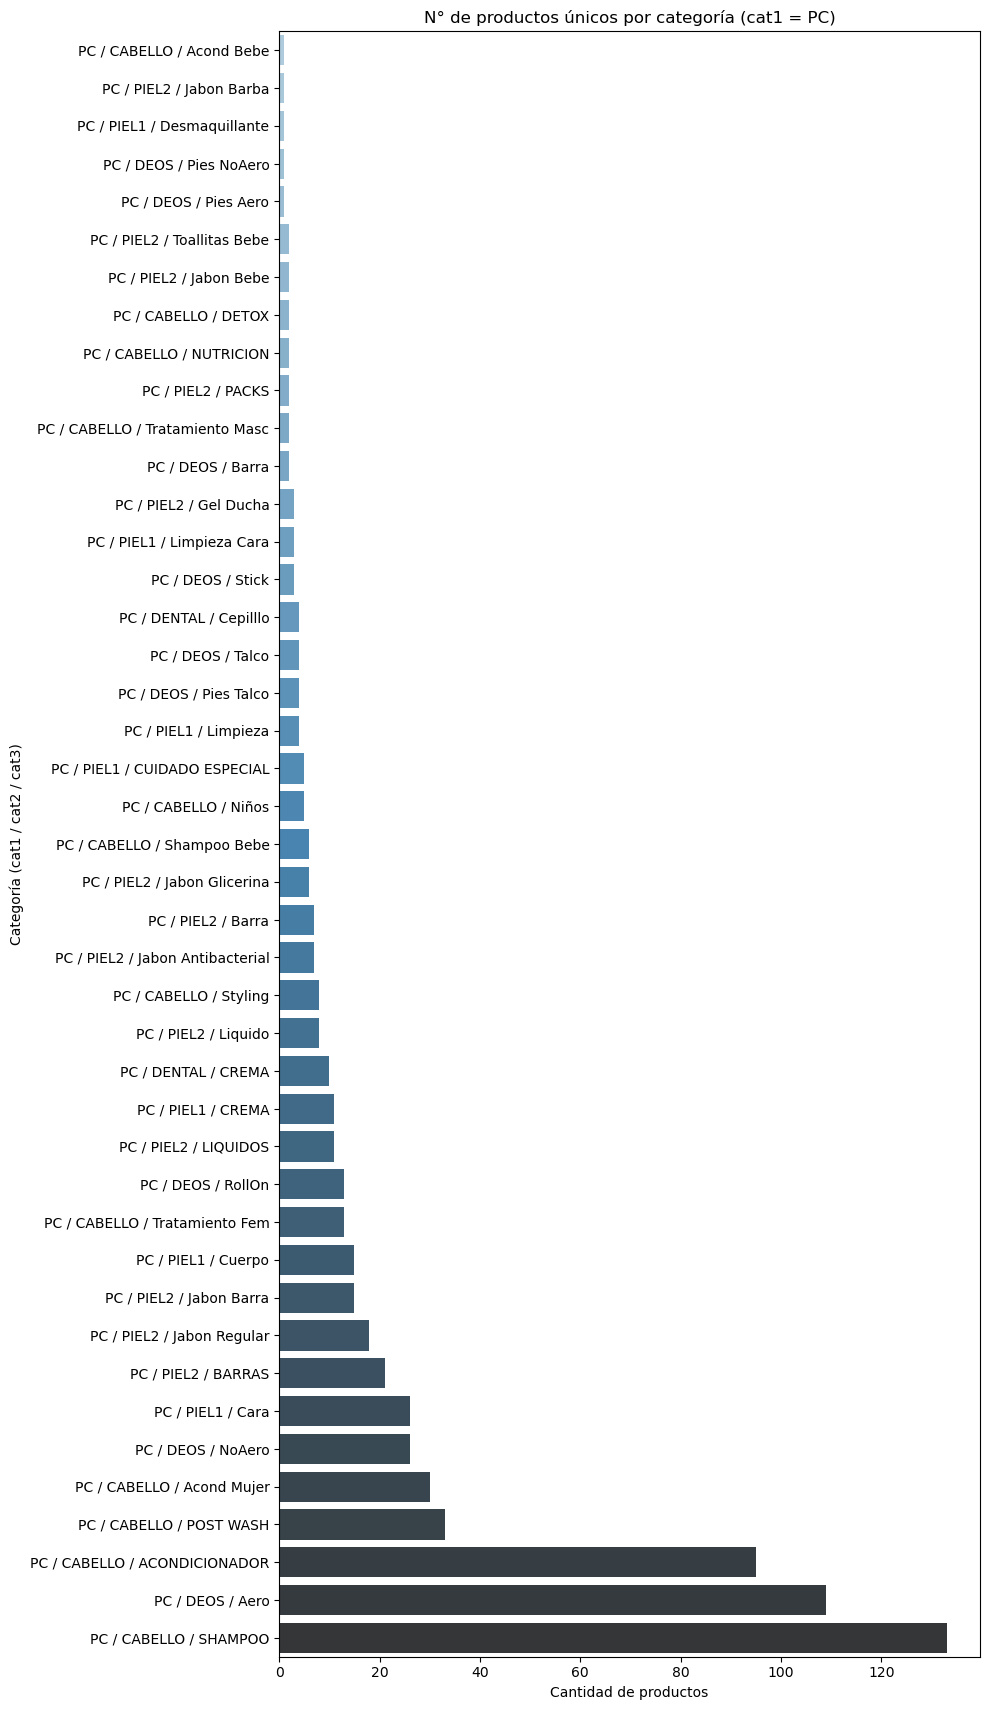

C:\Users\iparra\AppData\Local\Temp\ipykernel_14948\2217968868.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


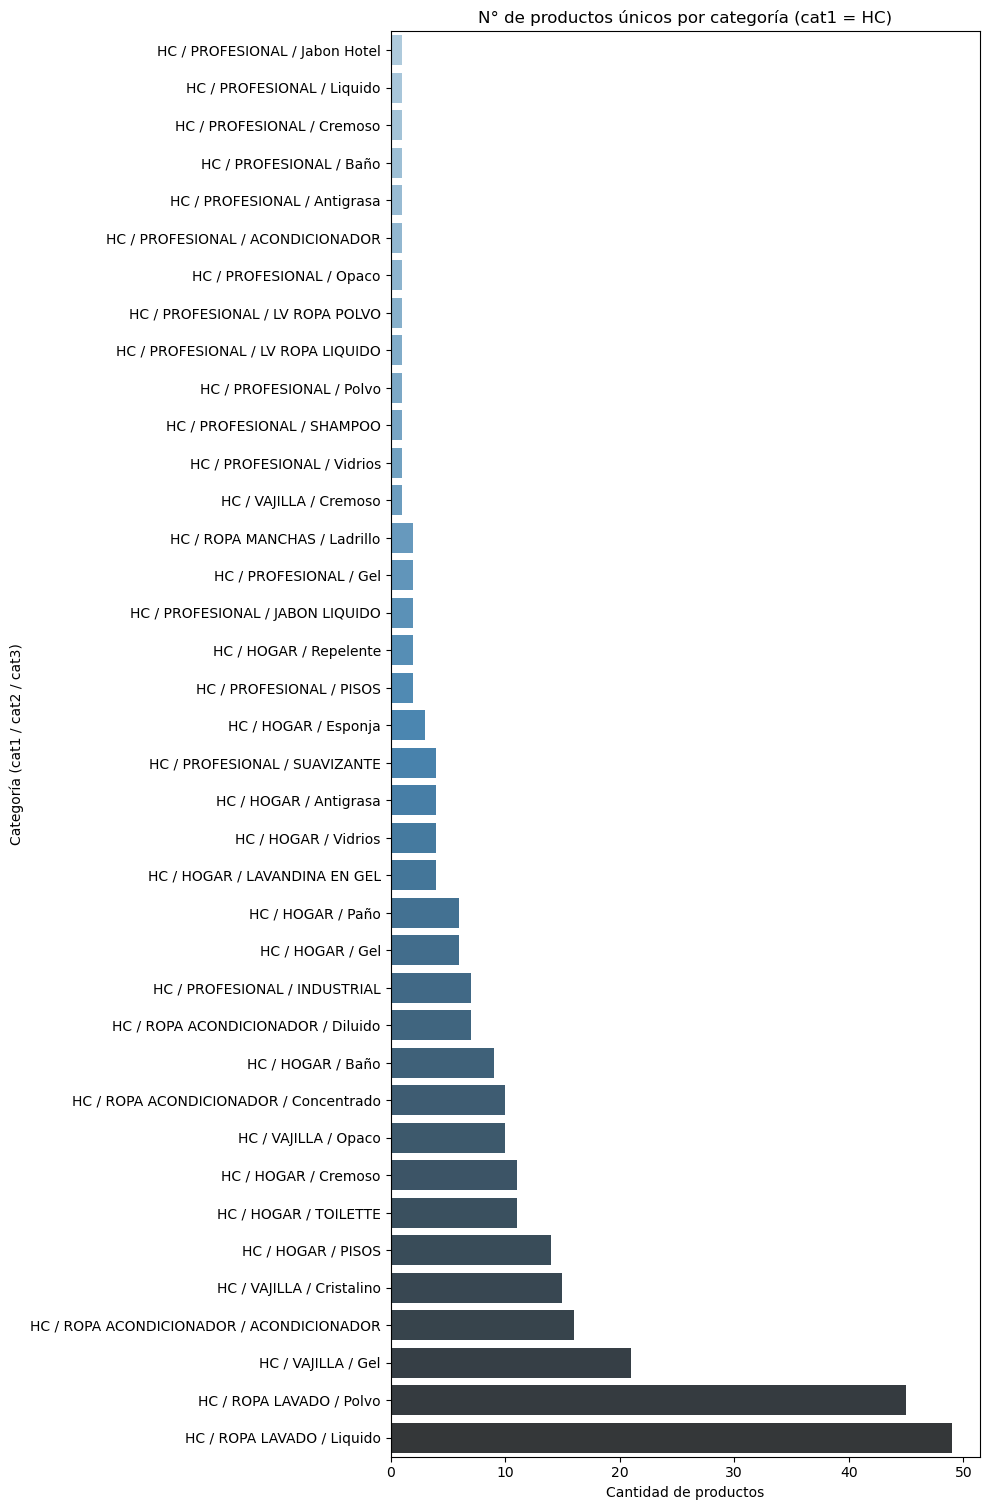

In [172]:
graficar_productos_vendidos_x_cat3(df, 'FOODS')
graficar_productos_vendidos_x_cat3(df, "REF")
graficar_productos_vendidos_x_cat3(df, "PC")
graficar_productos_vendidos_x_cat3(df, "HC")

In [176]:
df.isna().sum()

periodo                        0
customer_id                    0
product_id                     0
plan_precios_cuidados          0
cust_request_qty               0
cust_request_tn                0
tn                             0
cat1                        7448
cat2                        7448
cat3                        7448
brand                       7448
sku_size                    7448
stock_final              1814301
anio                           0
mes                            0
dtype: int64

In [179]:
df_brand = df.dropna(subset=['brand'])  # 👈 Elimina donde cat1 es NaN
df_brand['brand'].value_counts(normalize=True)[:3]

brand
NIVEA       0.130799
SHAMPOO3    0.113187
MAGGI       0.104955
Name: proportion, dtype: float64

In [183]:
def graficar_ventas_por_brand(df):
    # Asegurar tipo datetime en 'periodo'
    df = df.dropna(subset=['brand'])
    df['periodo_dt'] = pd.to_datetime(df['periodo'].astype(str), format='%Y%m')

    # Agrupar por mes y marca
    df_grouped = df.groupby(['periodo_dt', 'brand'])['tn'].sum().reset_index()

    # Lista de marcas únicas
    marcas = df_grouped['brand'].unique()
    n = len(marcas)
    n_cols = 2
    n_rows = math.ceil(n / n_cols)

    # Subplots por marca
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 4 * n_rows), sharex=True)
    axes = axes.flatten()

    for i, marca in enumerate(marcas):
        data_marca = df_grouped[df_grouped['brand'] == marca]

        sns.lineplot(
            data=data_marca,
            x='periodo_dt',
            y='tn',
            marker='o',
            ax=axes[i]
        )
        axes[i].set_title(f"Marca: {marca}")
        axes[i].set_xlabel("Periodo")
        axes[i].set_ylabel("Toneladas")
        axes[i].tick_params(axis='x', rotation=45, labelbottom=True)

    # Eliminar ejes vacíos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


C:\Users\iparra\AppData\Local\Temp\ipykernel_14948\4088625236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['periodo_dt'] = pd.to_datetime(df['periodo'].astype(str), format='%Y%m')


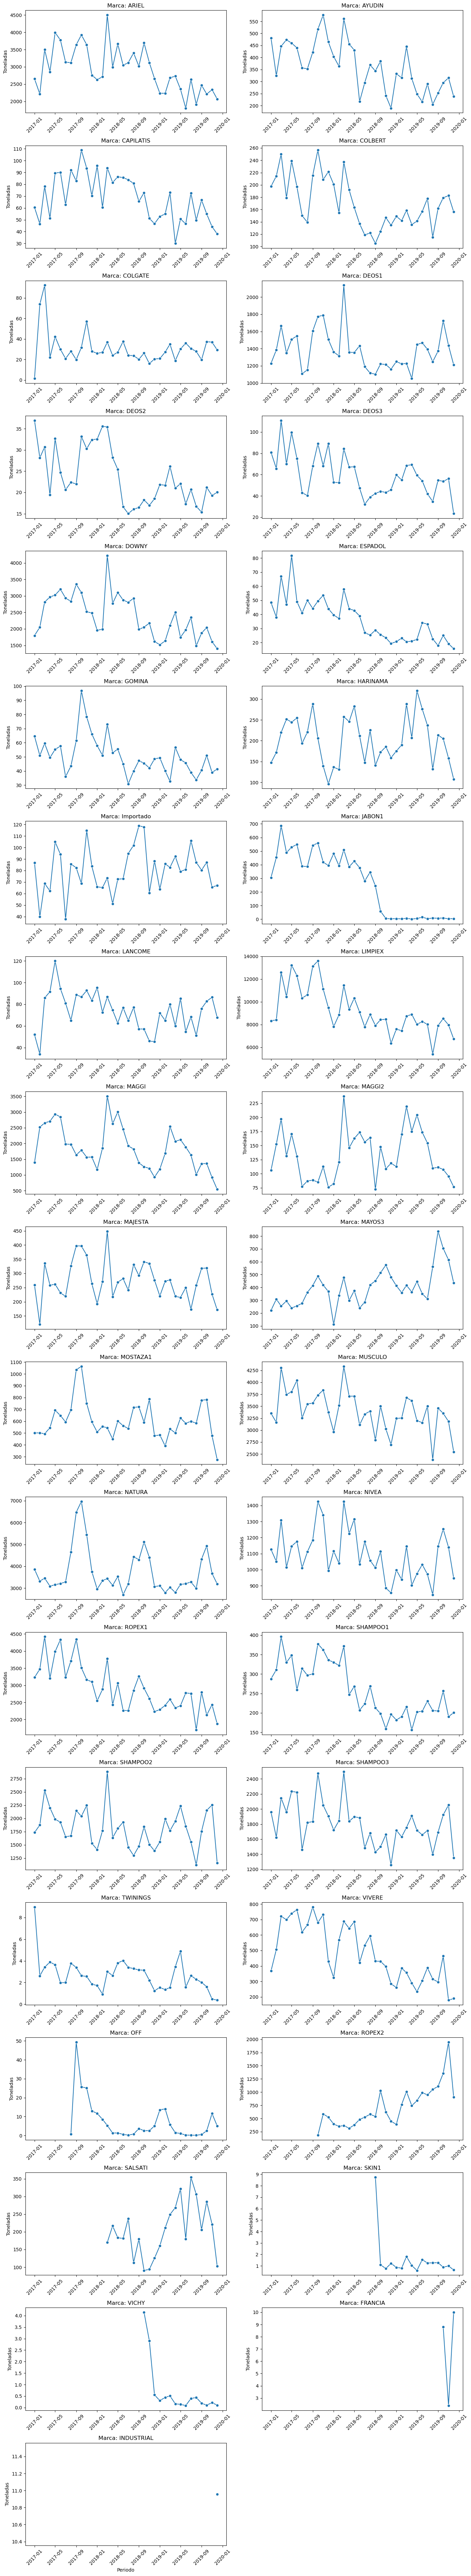

In [184]:
graficar_ventas_por_brand(df)

Etiquetar cada serie de producto (product_id) con una categoría como:

    📈 creciente

    📉 decreciente

    🔁 estacional

    🔀 volátil

    ❌ intermitente o inactiva

In [185]:
# armá una serie mensual por producto:
ventas = df.groupby(['product_id', 'periodo'])['tn'].sum().reset_index()
ventas['periodo_dt'] = pd.to_datetime(ventas['periodo'].astype(str), format='%Y%m')

# Esto te ayuda a procesar más fácilmente en bloque:
pivot = ventas.pivot(index='product_id', columns='periodo_dt', values='tn').fillna(0)

# Calcular estadísticas por serie
resultados = pd.DataFrame(index=pivot.index)

# Cantidad de puntos
resultados['n_meses'] = (pivot > 0).sum(axis=1)

# Promedio y variabilidad
resultados['media'] = pivot.mean(axis=1)
resultados['desviacion'] = pivot.std(axis=1)
resultados['cv'] = resultados['desviacion'] / resultados['media']  # coef. de variación

# Tendencia (correlación con el tiempo)
periodos = pivot.columns
t = range(len(periodos))
resultados['tendencia'] = pivot.apply(lambda x: pd.Series(x.values).corr(pd.Series(t)), axis=1)

# Estacionalidad: correlación con su promedio mensual por año
# (para más precisión se necesita descomposición estacional, opcional)

In [186]:
# Clasificacion heuristica simple
def clasificar_serie(row):
    if row['n_meses'] < 6:
        return 'inactiva'
    if row['cv'] > 1.5:
        return 'volátil'
    if row['tendencia'] > 0.6:
        return 'creciente'
    if row['tendencia'] < -0.6:
        return 'decreciente'
    return 'estable'

resultados['tipo_serie'] = resultados.apply(clasificar_serie, axis=1)
resultados[['media', 'cv', 'tendencia', 'tipo_serie']].head()

media        cv  tendencia tipo_serie
product_id                                             
20001       1398.344322  0.213213   0.422670    estable
20002       1009.368178  0.301015   0.643189  creciente
20003        889.004243  0.328499  -0.152258    estable
20004        671.615383  0.334194   0.007898    estable
20005        644.200514  0.338828   0.088067    estable

<Axes: title={'center': 'Cantidad de productos por tipo de serie'}, ylabel='tipo_serie'>

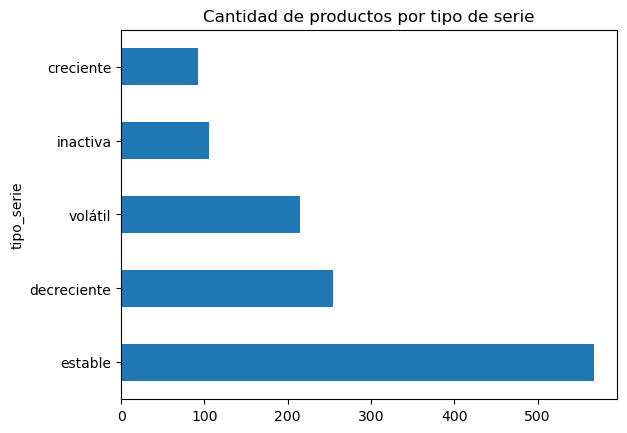

In [187]:
resultados['tipo_serie'].value_counts().plot(kind='barh', title='Cantidad de productos por tipo de serie')

##### Descomposición estacional 

Esto va a:

-    Generar 1 gráfico por producto con su tendencia, estacionalidad y residuo.

-   Aplicarse solo a productos con al menos 24 meses de datos.

-   Ignorar productos con series interrumpidas o que generen errores.

In [188]:
from statsmodels.tsa.seasonal import seasonal_decompose

serie = pivot.loc[product_id]
serie.index = pd.to_datetime(serie.index)
resultado = seasonal_decompose(serie, model='additive', period=12)
resultado.plot()

NameError: name 'product_id' is not defined

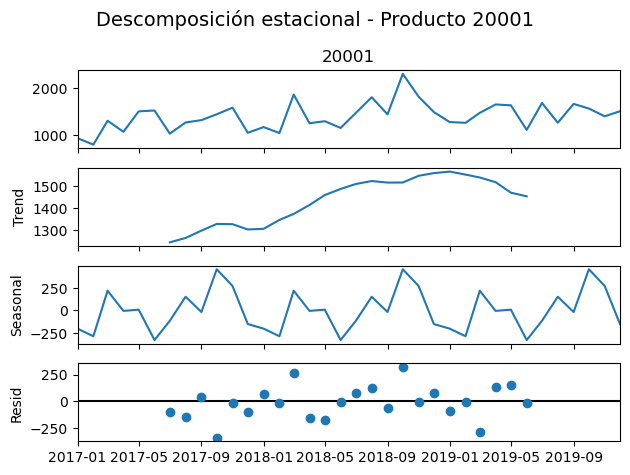

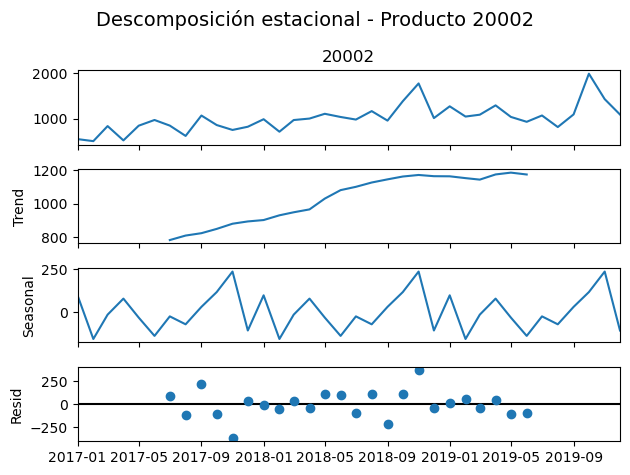

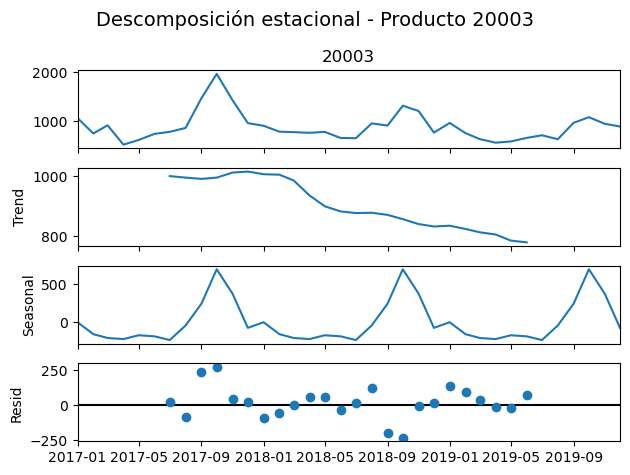

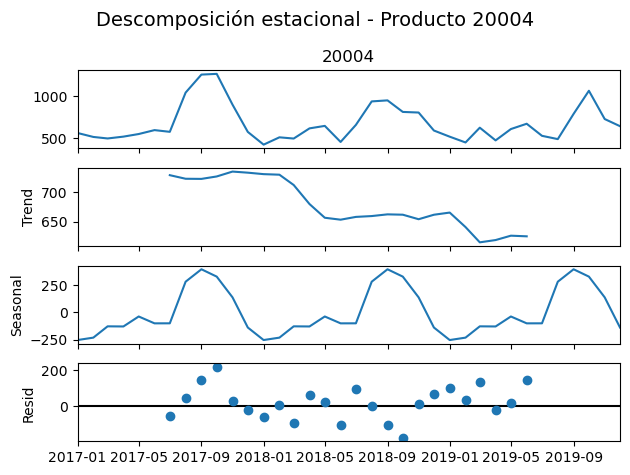

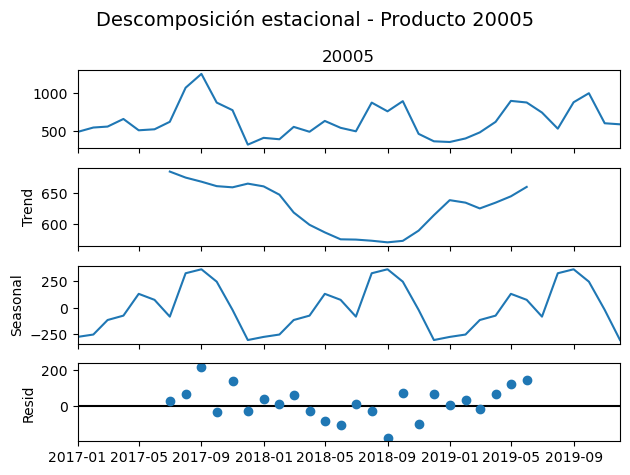

In [194]:
from statsmodels.tsa.seasonal import seasonal_decompose

ventas = df.groupby(['product_id', 'periodo'])['tn'].sum().reset_index()
ventas['periodo_dt'] = pd.to_datetime(ventas['periodo'].astype(str), format='%Y%m')

pivot = ventas.pivot(index='product_id', columns='periodo_dt', values='tn').fillna(0)
pivot = pivot.iloc[:5]


# Recorrer productos con al menos 24 períodos de datos no nulos
for product_id in pivot.index:
    serie = pivot.loc[product_id]

    # Reindexar a fechas (necesario para descomposición)
    serie.index = pd.to_datetime(serie.index)

    # Verificar que tenga al menos 24 valores no nulos
    if (serie != 0).sum() >= 24:
        try:
            resultado = seasonal_decompose(serie, model='additive', period=12)
            fig = resultado.plot()
            fig.suptitle(f"Descomposición estacional - Producto {product_id}", fontsize=14)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error con producto {product_id}: {e}")


##### Top 10 Categorias más vendidas

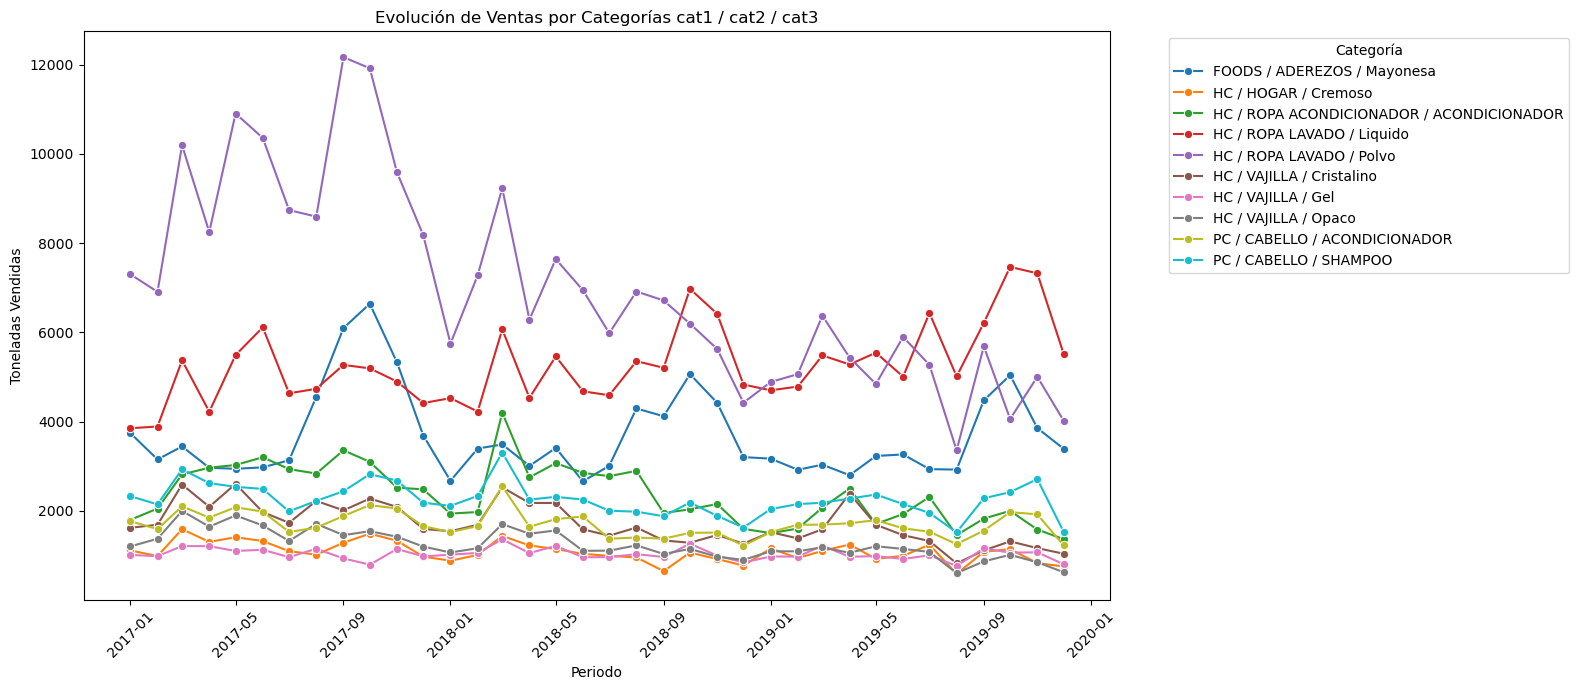

In [196]:
# Agrupar
ventas_categorias = df.groupby(['periodo', 'cat1', 'cat2', 'cat3'])['tn'].sum().reset_index()
ventas_categorias['periodo_dt'] = pd.to_datetime(ventas_categorias['periodo'].astype(str), format='%Y%m')

# Crear columna combinada para graficar
ventas_categorias['categoria_completa'] = (
    ventas_categorias['cat1'].astype(str) + " / " +
    ventas_categorias['cat2'].astype(str) + " / " +
    ventas_categorias['cat3'].astype(str)
)

# Como hay muchas combinaciones, filtramos

top_categorias = (
    ventas_categorias.groupby('categoria_completa')['tn']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

ventas_top = ventas_categorias[ventas_categorias['categoria_completa'].isin(top_categorias)]

plt.figure(figsize=(16, 7))
sns.lineplot(data=ventas_top, x='periodo_dt', y='tn', hue='categoria_completa', marker='o')
plt.title("Evolución de Ventas por Categorías cat1 / cat2 / cat3")
plt.xlabel("Periodo")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=45)
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### Promedio Mensual de Ventas por Categoría (cat1/cat2/cat3)

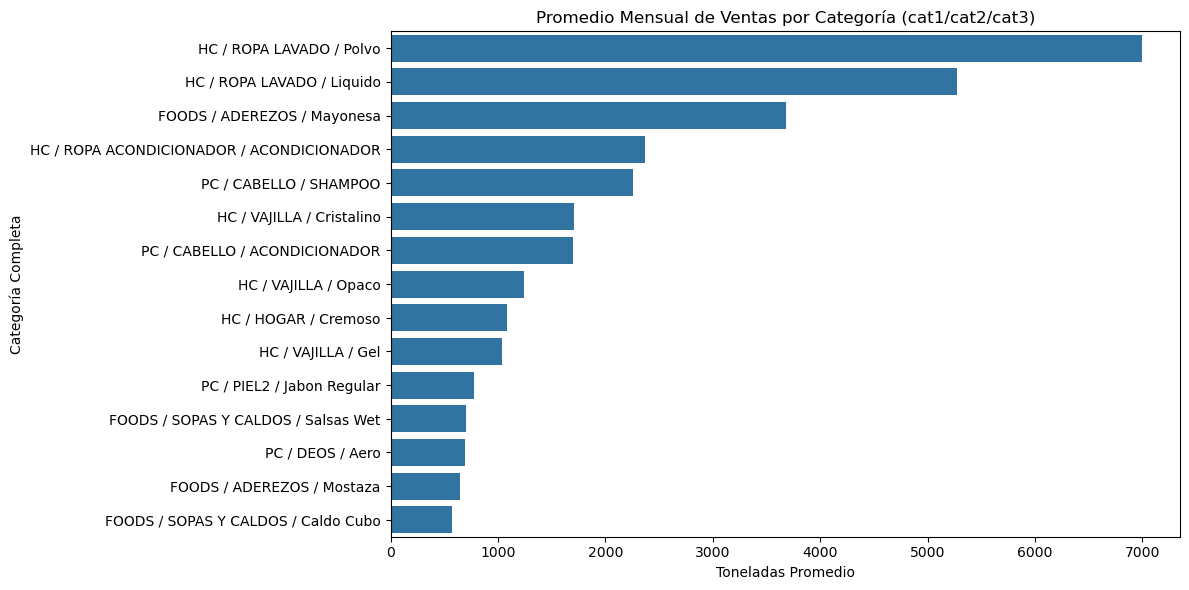

In [197]:
# Distribucion promedio por categoria completa
ventas_avg = (
    ventas_categorias
    .groupby('categoria_completa')['tn']
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=ventas_avg.values, y=ventas_avg.index)
plt.title("Promedio Mensual de Ventas por Categoría (cat1/cat2/cat3)")
plt.xlabel("Toneladas Promedio")
plt.ylabel("Categoría Completa")
plt.tight_layout()
plt.show()


##### Precios Cuidados

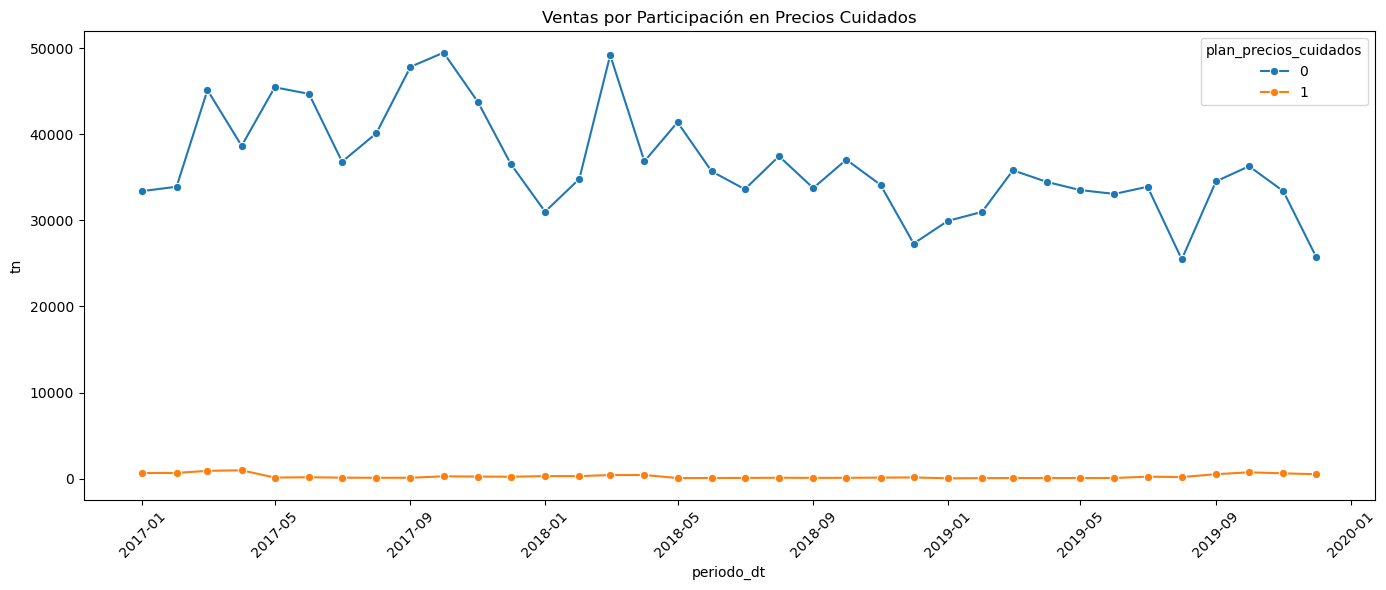

In [200]:
# 7. IMPACTO DE PRECIOS CUIDADOS
pc_impacto = df.groupby(['periodo', 'plan_precios_cuidados'])['tn'].sum().reset_index()
pc_impacto['periodo_dt'] = pd.to_datetime(pc_impacto['periodo'].astype(str), format='%Y%m')
pc_impacto['periodo'] = pc_impacto['periodo'].astype(str)
plt.figure(figsize=(14, 6))
sns.lineplot(data=pc_impacto, x='periodo_dt', y='tn', hue='plan_precios_cuidados', marker='o')
plt.title("Ventas por Participación en Precios Cuidados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Diferencia entre Pedido y Compra

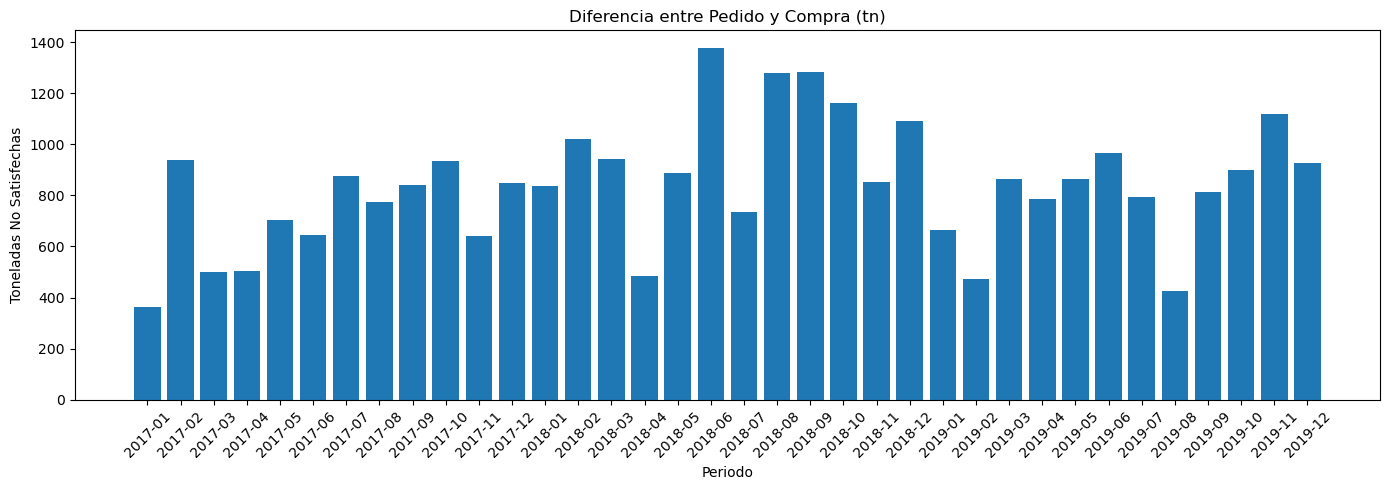

In [35]:
# 8. DIFERENCIA ENTRE PEDIDO Y COMPRA
df['tn_gap'] = df['cust_request_tn'] - df['tn']

gap_mensual = df.groupby('anio_mes')['tn_gap'].sum().reset_index()
gap_mensual['anio_mes'] = gap_mensual['anio_mes'].astype(str)

plt.figure(figsize=(14, 5))
plt.bar(gap_mensual['anio_mes'].astype(str), gap_mensual['tn_gap'])
plt.title("Diferencia entre Pedido y Compra (tn)")
plt.xlabel("Periodo")
plt.ylabel("Toneladas No Satisfechas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Quiebres de Stock

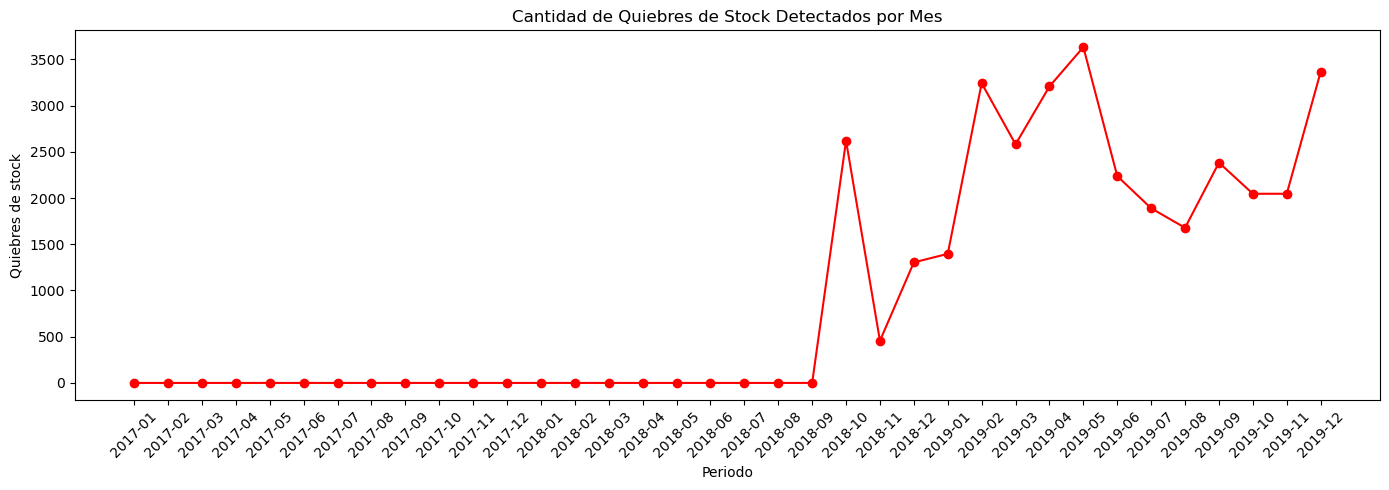

In [36]:
# 9. ANÁLISIS DE STOCKS
df['quiebre_stock'] = np.where((df['cust_request_tn'] > 0) & (df['stock_final'] == 0), 1, 0)
quiebres = df.groupby('anio_mes')['quiebre_stock'].sum().reset_index()

quiebres['anio_mes'] = quiebres['anio_mes'].astype(str)

plt.figure(figsize=(14, 5))
plt.plot(quiebres['anio_mes'].astype(str), quiebres['quiebre_stock'], marker='o', color='red')
plt.title("Cantidad de Quiebres de Stock Detectados por Mes")
plt.xlabel("Periodo")
plt.ylabel("Quiebres de stock")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 10. TOP PRODUCTOS MAS VENDIDOS
top_productos = df.groupby('product_id')['tn'].sum().sort_values(ascending=False).head(10).reset_index()
top_productos = top_productos.merge(productos, on='product_id', how='left')

In [38]:
print("Top 10 productos más vendidos:")
display(top_productos[['product_id', 'brand', 'cat1', 'cat2', 'tn']])

Top 10 productos más vendidos:


product_id    brand   cat1                 cat2           tn
0        20001    ARIEL     HC          ROPA LAVADO  50340.39558
1        20010  LIMPIEX     HC          ROPA LAVADO  37342.15836
2        20010  LIMPIEX     HC          ROPA LAVADO  37342.15836
3        20002  LIMPIEX     HC          ROPA LAVADO  36337.25439
4        20003   NATURA  FOODS             ADEREZOS  32004.15274
5        20021  LIMPIEX     HC          ROPA LAVADO  25003.78252
6        20021  LIMPIEX     HC          ROPA LAVADO  25003.78252
7        20020  LIMPIEX     HC          ROPA LAVADO  24516.78008
8        20020  LIMPIEX     HC          ROPA LAVADO  24516.78008
9        20004   NATURA  FOODS             ADEREZOS  24178.15379
10       20005   NATURA  FOODS             ADEREZOS  23191.21852
11       20007    DOWNY     HC  ROPA ACONDICIONADOR  22018.45234
12       20022  LIMPIEX     HC          ROPA LAVADO  21387.99848
13       20022  LIMPIEX     HC          ROPA LAVADO  21387.99848

In [41]:
# 10. TOP PRODUCTOS menos VENDIDOS
df_aux = df.copy()
df_aux.dropna(inplace=True)
top_productos = df.groupby('product_id')['tn'].sum().sort_values(ascending=True).head(10).reset_index()
top_productos = top_productos.merge(productos, on='product_id', how='left')

In [42]:
print("Top 10 productos más vendidos:")
display(top_productos[['product_id', 'brand', 'cat1', 'cat2', 'tn']])

Top 10 productos más vendidos:


product_id  brand cat1     cat2       tn
0       21299    NaN  NaN      NaN  0.00546
1       21298    NaN  NaN      NaN  0.00573
2       21297    NaN  NaN      NaN  0.00579
3       21296    NaN  NaN      NaN  0.00651
4       21295    NaN  NaN      NaN  0.00699
5       21294  NIVEA   PC  CABELLO  0.00764
6       21293    NaN  NaN      NaN  0.00917
7       21292    NaN  NaN      NaN  0.00983
8       21291    NaN  NaN      NaN  0.01092
9       21290    NaN  NaN      NaN  0.01174

In [51]:
import streamlit as st

# EDA al grano

🎯 Objetivo:

Analizar productos individualmente para entender:

    Su evolución temporal

    Comparación entre lo pedido y lo efectivamente comprado

    Relación con stock disponible

    Participación en programas como Precios Cuidados

    Estacionalidad y consistencia de ventas

In [ ]:
producto_objetivo = 20001
df_producto = df[df['product_id'] == producto_objetivo].copy()

In [52]:
# Contar cantidad de meses con ventas por producto
historial = df[df['tn'] > 0].groupby('product_id')['anio_mes'].nunique().reset_index()
historial.columns = ['product_id', 'meses_con_ventas']

# Filtrar productos con más de 12 meses de ventas
productos_estables = historial[historial['meses_con_ventas'] >= 12]['product_id'].tolist()

print(f"Se encontraron {len(productos_estables)} productos con al menos 12 meses de ventas.")


Se encontraron 961 productos con al menos 12 meses de ventas.


In [53]:
def plot_producto(product_id):
    df_prod = df[df['product_id'] == product_id].sort_values('anio_mes')
    
    fig, ax1 = plt.subplots(figsize=(14, 6))

    sns.lineplot(data=df_prod, x='anio_mes', y='tn', label='Ventas (tn)', ax=ax1, marker='o')
    sns.lineplot(data=df_prod, x='anio_mes', y='cust_request_tn', label='Pedidos (tn)', ax=ax1, marker='x')
    ax1.set_title(f"Evolución del Producto ID {product_id}")
    ax1.set_xlabel("Mes")
    ax1.set_ylabel("Toneladas")
    ax1.tick_params(axis='x', rotation=45)

    ax2 = ax1.twinx()
    sns.barplot(data=df_prod, x='anio_mes', y='stock_final', color='gray', alpha=0.3, ax=ax2)
    ax2.set_ylabel("Stock Final")
    ax2.grid(False)

    fig.tight_layout()
    plt.show()


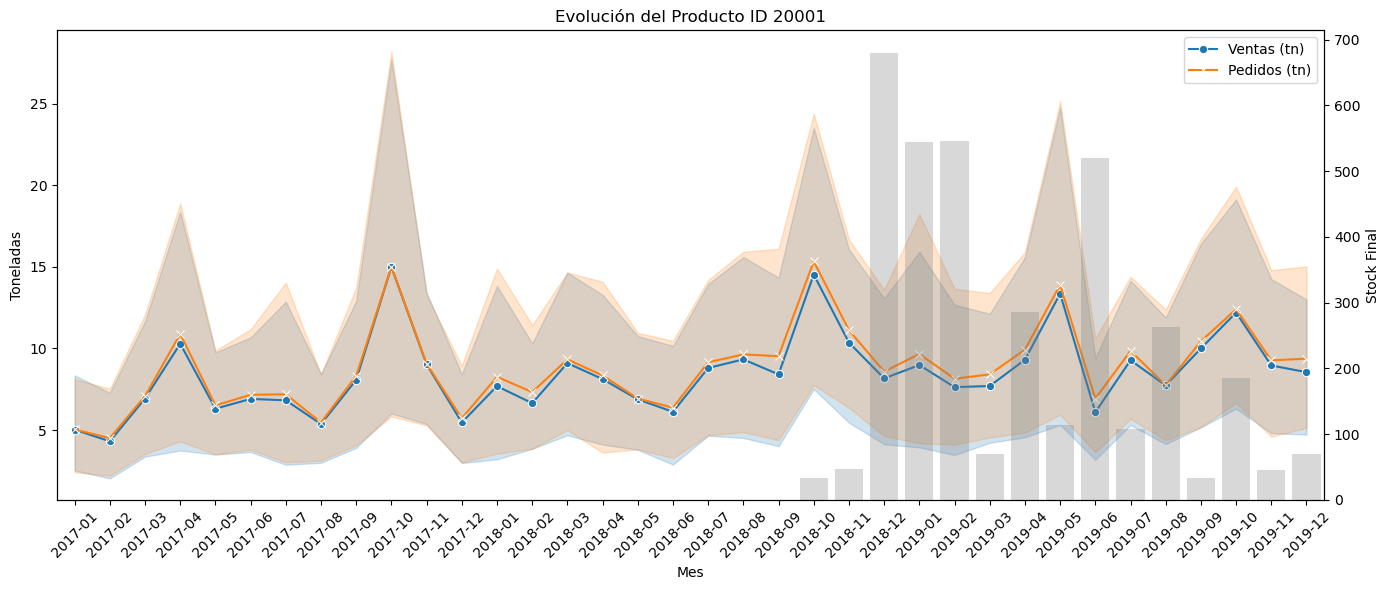

In [54]:
# Elegir uno de los productos estables
ejemplo = productos_estables[0]
plot_producto(ejemplo)

--- Producto: 20001 ---


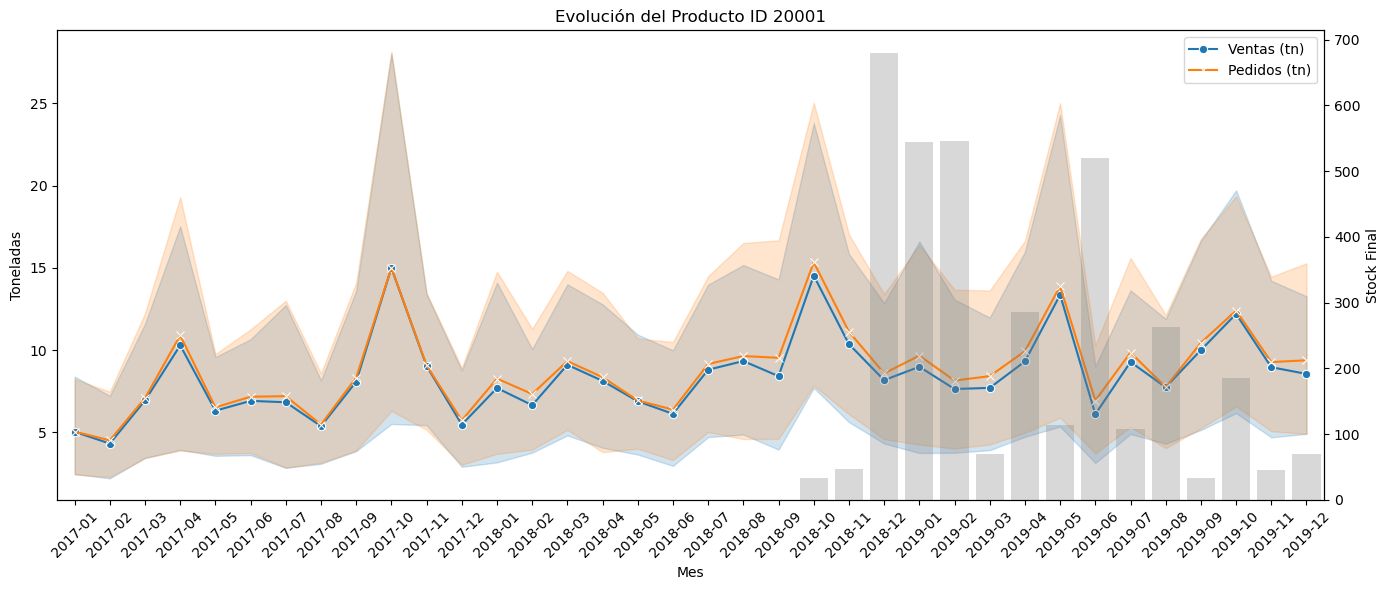

--- Producto: 20002 ---


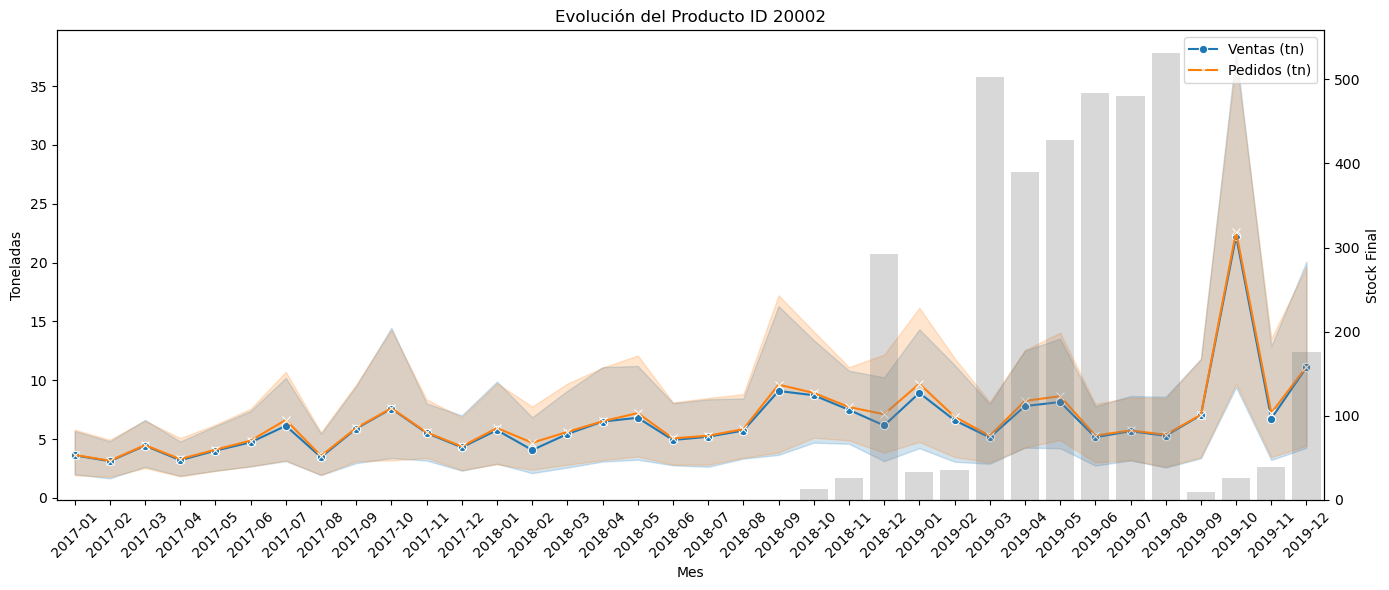

--- Producto: 20003 ---


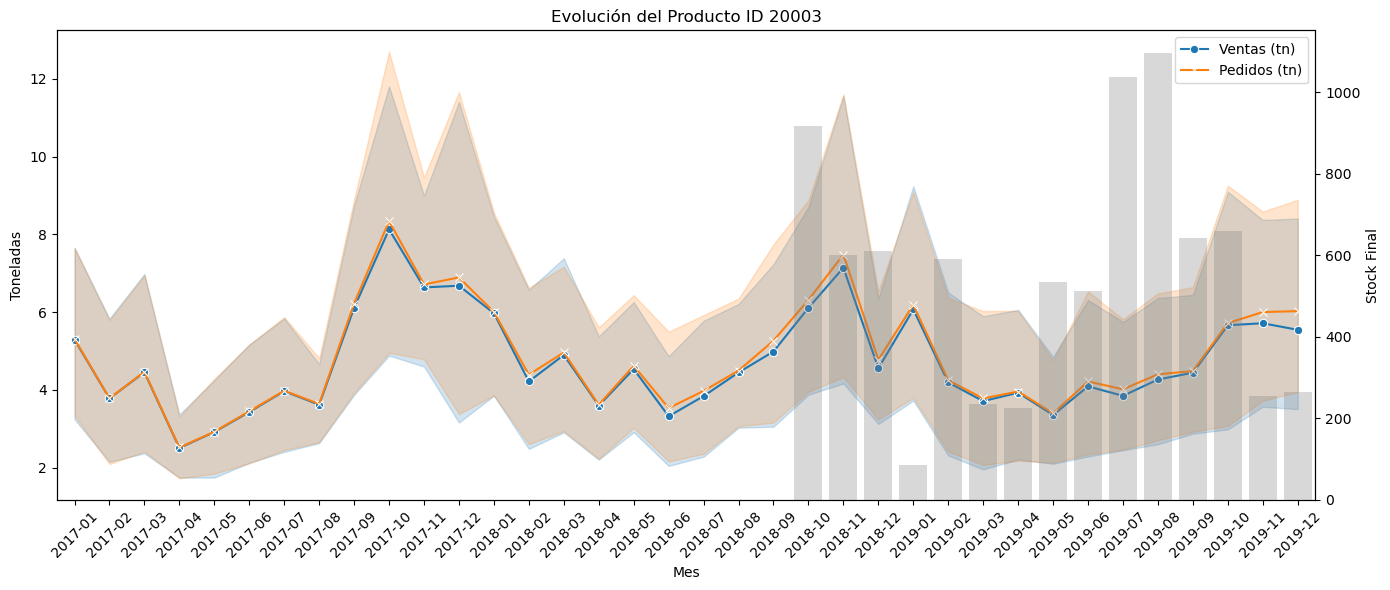

--- Producto: 20004 ---


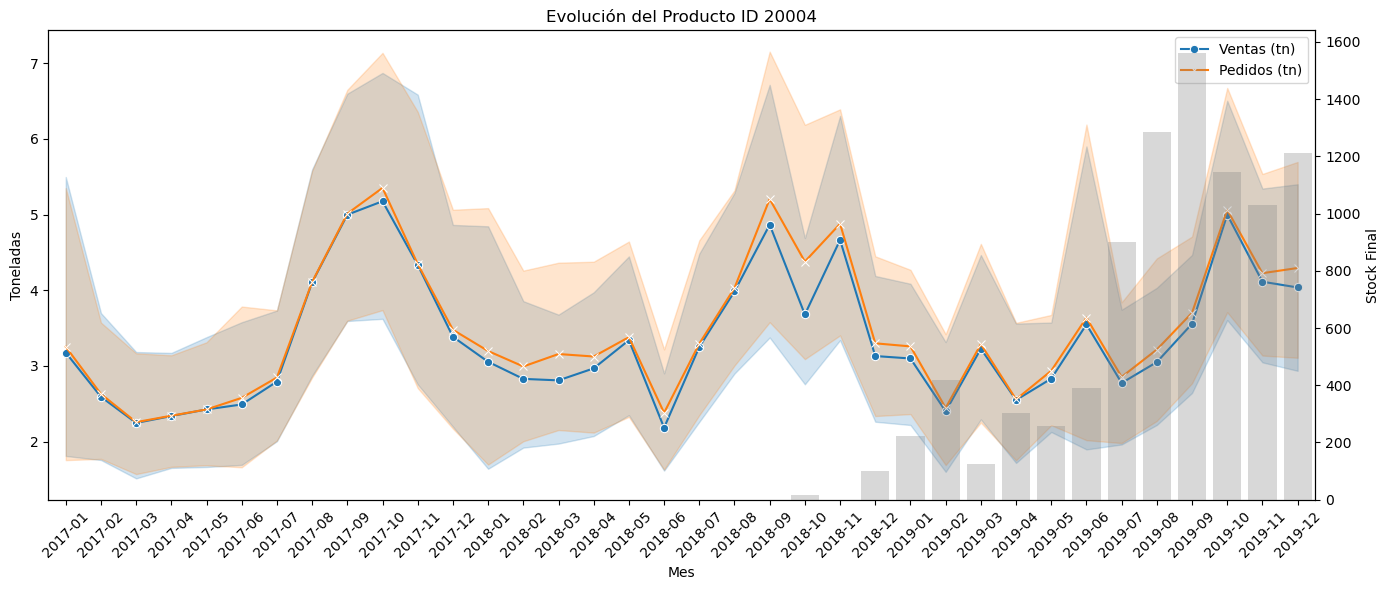

--- Producto: 20005 ---


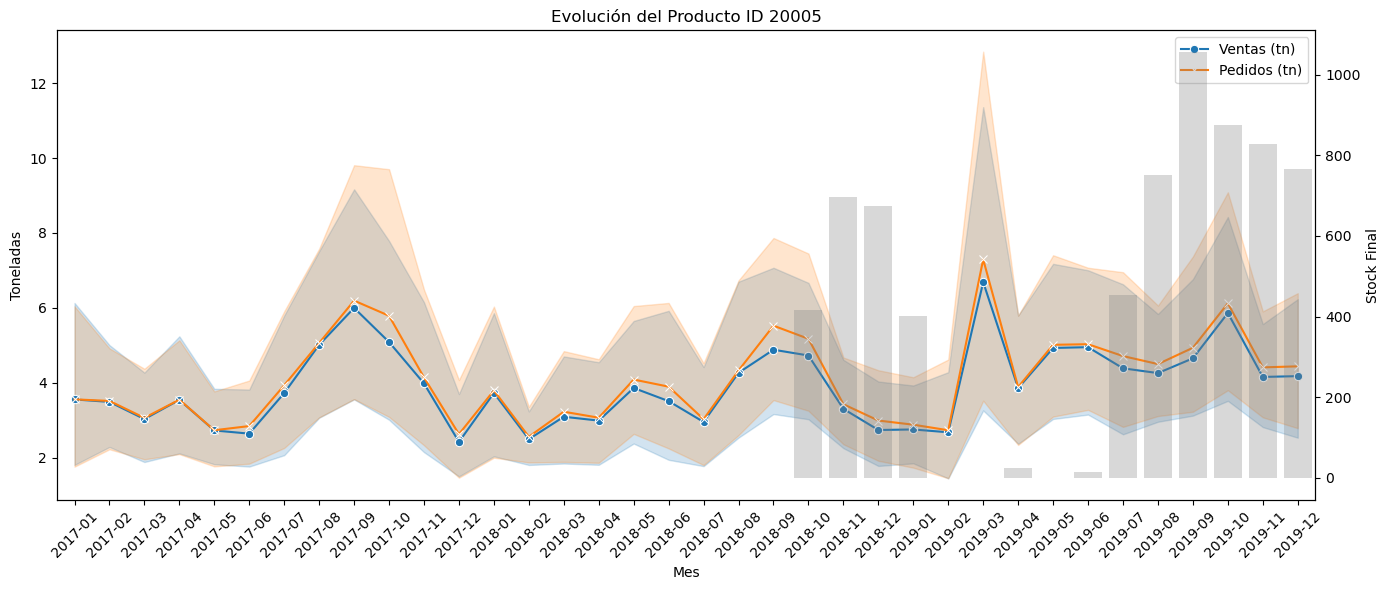

In [55]:
for pid in productos_estables[:5]:
    print(f"--- Producto: {pid} ---")
    plot_producto(pid)

In [ ]:
print("Hola mundo")